In [2]:
# Importamos las librerias necesarias (Son todas las librerias) para hacer un analisis exploratorio de datos

In [13]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

In [14]:
# Establecer apariencia general de los gráficos

In [17]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
        'Adelie': '#ff6602ff',
        'Gentoo': '#0f7175ff',
        'Chinstrap': '#c65dc9ff'
    }

# Usando palmerpinguins

In [16]:
#Datos crudos
raw_pinguins_df = palmerpenguins.load_penguins_raw()
#Usando seaborns
sns.load_dataset('penguins')
#Usando nuestros propios datos
preprocess_penguins_df=pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

# Ejercicio de validacion de datos

<AxesSubplot: >

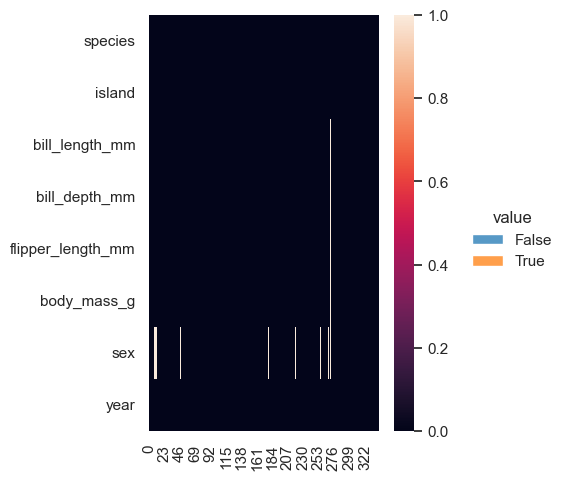

In [18]:
#¿Que tipo de datos son las variables del conjunto de datos?
preprocess_penguins_df.dtypes #Nos responde la pregunta anterior (object = true)

#¿Cuantas variables de cada tipo de dato tenemos en nuestro conjunto de datos?
(#Hacer esto es mas organizado, pero si no tendriamos los parentesis quedaria preprocess_penguins_df.dtypes.value_counts()
    preprocess_penguins_df
    .dtypes 
    .value_counts()
)#Nos responde la pregunta anterior

#¿Cuantas variables y observaciones tenemos en el conjunto de datos? (Variables = columnas, Observaciones = filas)
preprocess_penguins_df.shape #(Observaciones, Variables)

#¿Existen Valores nulos en mis datos?
(
    preprocess_penguins_df
    .isnull()
    .any()
) #Nos arroja dentro de que variables existen, si quitamos el any() nos mandara solo 1 y 0

#¿Cuantos valores nulos hay en cada variable?
(
    preprocess_penguins_df
    .isnull()
    .sum()
    #.sum() #Si le agregamos este sum,  nos mandara el total de valores nulos de toda la tabla
)

#Graficacion de las valores nulos
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable', #Aparece en el melt
                hue='value', #Aparece en el melt(true or false)
                multiple='fill'#Hace que los colores se vean bien
            )
        )
        
#     Pipe -> Es un metodo de pandas capaz de pasar funciones o paquetes a dataframe
#     displot -> Nos permite generar un histograma o grafico de alfombra
    
    )
)


#¿Como puedo saber de cual observacion parten mis valores nulos
(
     preprocess_penguins_df
    .isnull().T
    #En la linea anterior hemos transpuesto la tabla, como una matriz, para que las columnas sean ahora nuestras obervaciones
    #Es decir, poner las observaciones como variables
    .pipe(
        lambda df:(sns.heatmap(data=df))
    )
)




# Conteos y proporciones

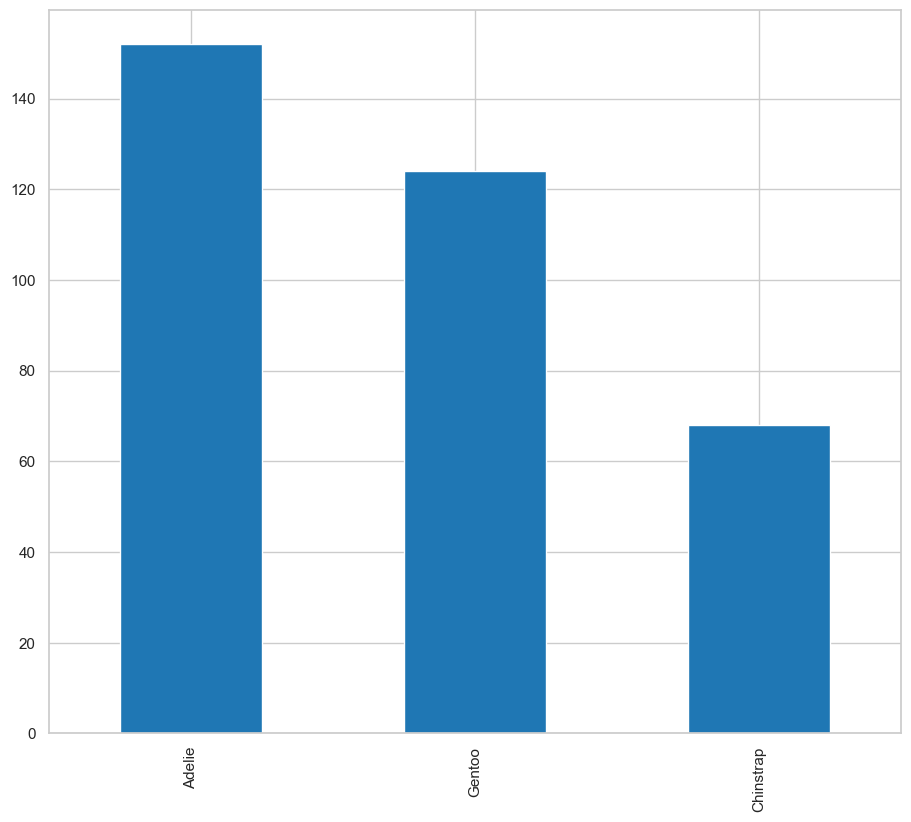

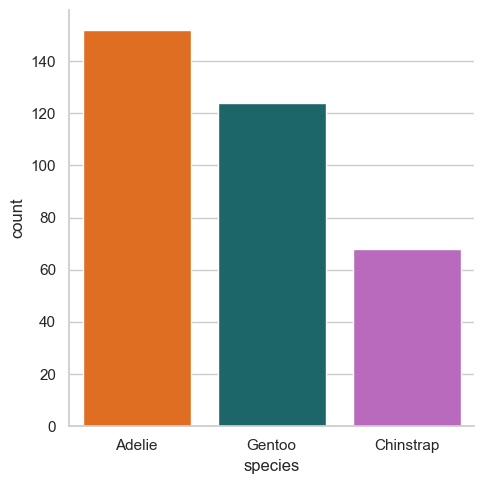

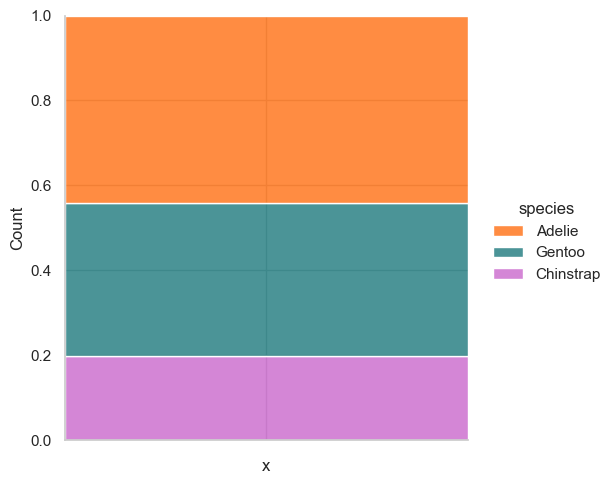

In [21]:
#Primero debemos conocer la frecuencia de aparicion de todas las variables.
preprocess_penguins_df.describe(include='all') #Nos arroja incluso los valores estadisticos

#Separemos las variables

preprocess_penguins_df.describe(include=[np.number])#Numericas
preprocess_penguins_df.describe(include=object)#Nos manda las variables categoricas
#Si queremos hacer un filtro mas grande podemos hacer lo siguiente
(
    preprocess_penguins_df
    .astype({
        'species':'category',
        'island':'category',#Cambia island a category
        'sex':'category'
    })
    .describe(include='category')
)#Donde incluira todo lo que sea category

#Visualizacion de conteos.
(
    preprocess_penguins_df
    .species
    .value_counts()
)#Con esto podemos contarlo, pero si queremos graficar haremos lo siguiente:
(
    preprocess_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar'
    ) #kind indica el tipo de grafica, en esta caso hemos elegido barra
)
#Si de pura casualidad queremos mas vistoso nuestro grafico podemos usar seaborn
sns.catplot(
    data=preprocess_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color #palette se puede quedar por defecto.
)

#Visualizacion de proporciones
(
    preprocess_penguins_df
    .add_column('x','') #para que seaborn lo entienda de otra manera distinta las demas
    #la linea anterior es solo porque tenemos mas graficas anteriores, lejos de eso se puede admitir
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill',#Que nos de la proporcion completa
                palette=penguin_color
            )
        )
    )
)


# Medidas de tendencia central

In [26]:
#Media o promedio
( #Por medio de pandas
    preprocess_penguins_df
    .bill_depth_mm #Variable dentro de la tabla
    .mean()
)#Si quitamos el bill_depth_mm se mostrara la mediana de todas las variables
np.mean( preprocess_penguins_df.bill_depth_mm)#Por medio de numpy


#Mediana
preprocess_penguins_df.median()

#Moda
preprocess_penguins_df.mode()

C:\Users\taqui\AppData\Local\Temp\ipykernel_1696\1448181895.py:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.median()


species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  year  
0       3800.0  male  2009

# Medidas de dispersion

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\2554566374.py:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.std()
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\2554566374.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.mean()
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\2554566374.py:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

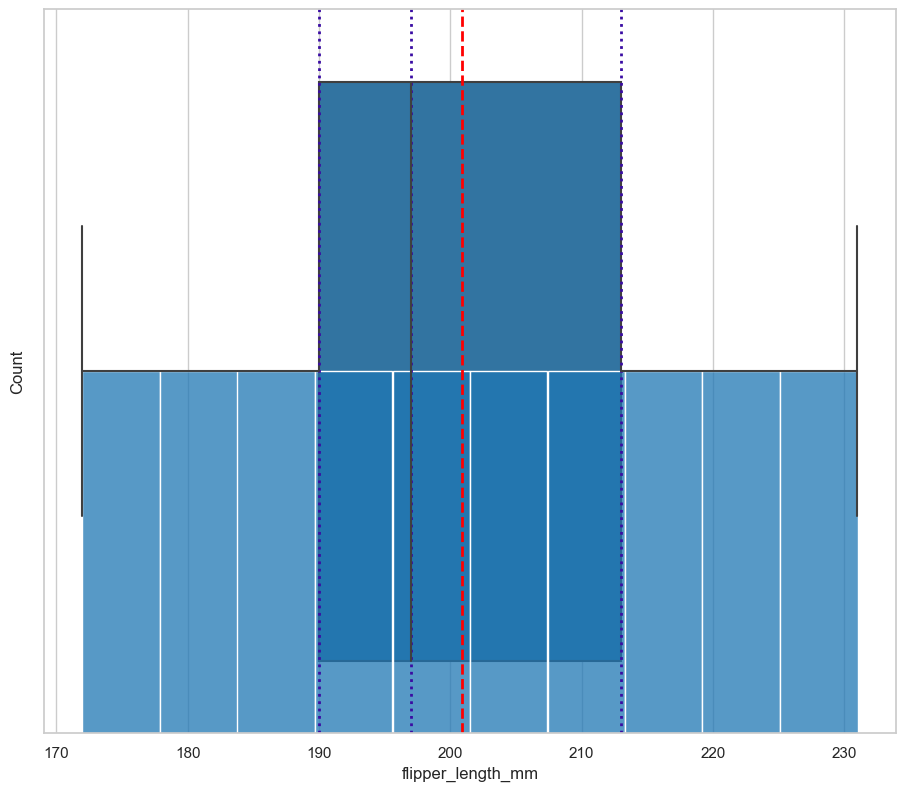

In [10]:
# preprocess_penguins_df.max(numeric_only=True)#Nos da el valor maximo de los numeros
preprocess_penguins_df.min(numeric_only=True)#Nos da el valor minimo de los numeros

#Rango
preprocess_penguins_df.max(numeric_only=True) - preprocess_penguins_df.min(numeric_only=True) #Max-Min

#Desviacion estandar
preprocess_penguins_df.std()

#Media
preprocess_penguins_df.mean()

#El valor minimo del rango
preprocess_penguins_df.mean()-preprocess_penguins_df.std() #Es el tope minimo

#El valor maximo del rango
preprocess_penguins_df.mean()-preprocess_penguins_df.std()#Es el tope maximo

#Rango intercuartilico
cuartil1=0.25
Media_cuartil2 = 0.50
cuartil3=0.75
preprocess_penguins_df.quantile(cuartil3) #nos manda el cuartil
preprocess_penguins_df.quantile(cuartil3)-preprocess_penguins_df.quantile(cuartil1)#Rango intercuartilico
#Tambien podemos poner todos estos valores en forma de tabla
(
    preprocess_penguins_df
    .quantile(q=[cuartil1,Media_cuartil2,cuartil3]).T#Cambiamos las variables a filas 
    #El q de quantile es necesario, no se puede cambiar por otro nombre
    .rename_axis('variable')
    .reset_index()
    .assign(
        Rango_Intercuartilico=lambda df: df[cuartil3]-df[cuartil1]
    )
)


#Histograma -> Ver distribucion de una variable
sns.histplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm'
)
#Graficando la media
plt.axvline(
    x=preprocess_penguins_df.flipper_length_mm.mean(), #De el df de pinguinos, de la variable flipper_length, la mediana
    color='red',#El color
    linestyle='dashed', #El estilo de la linea
    linewidth=2 #El grosor de la linea
)
#Graficando los cuartiles
#Cuartil 1
plt.axvline(
    x=preprocess_penguins_df.flipper_length_mm.quantile(cuartil1),
    color="#3a0ca3",
    linestyle=':', #: = dotted
    linewidth=2
)
#Cuartil2
plt.axvline(
    x=preprocess_penguins_df.flipper_length_mm.quantile(Media_cuartil2),
    color="#3a0ca3",
    linestyle=':', 
    linewidth=2
)
#Cuartil3
plt.axvline(
    x=preprocess_penguins_df.flipper_length_mm.quantile(cuartil3),
    color="#3a0ca3",
    linestyle=':', 
    linewidth=2
) #Y asi con las demas medidas de dispersion

#Boxplot o Diagrama de caja
sns.boxplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm'
)#Nos ayuda a encontrar el sesgo




ERROR EN LOS HISTOGRAMAS

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

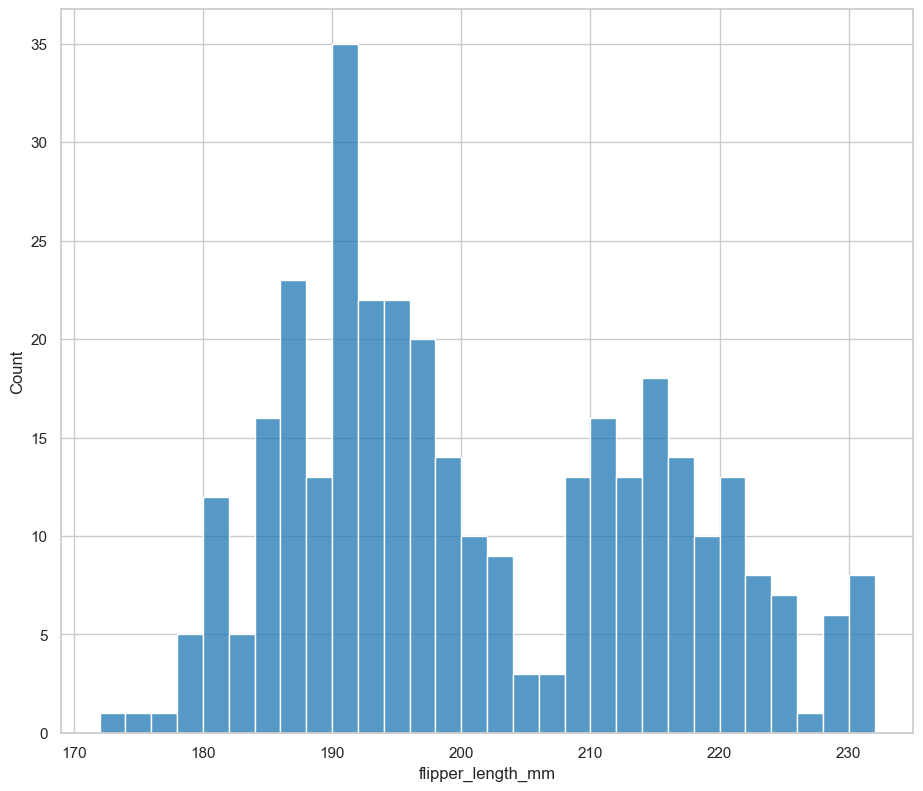

In [11]:
# Hay un error muy frecuente en los histogramas, y es el bindwidth, el bindwith es la cantidad de 
# informacion que mostramos en la tabla, si tenemos un bindwidth alto hara zoom,  si es bajo alejara
# el grafico, esto puede ser problematico,  pues oculta informacion, entonces, hice una funcion que 
# soluciona este problema a traves de los cuartiles:

def freedman_diaconis_binwidth(x:pd.Series)->float:
    IQR=x.quantile(0.75)-x.quantile(.25)
    N=x.size
    return 2*IQR/N**(1/3)

sns.histplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    binwidth=2 #El valor que tanto varia
)

# Distribuciones: PMFs, CDFs, PDFs

Funciones de probabilidad de masas (PMFs)

0.06432748538011696

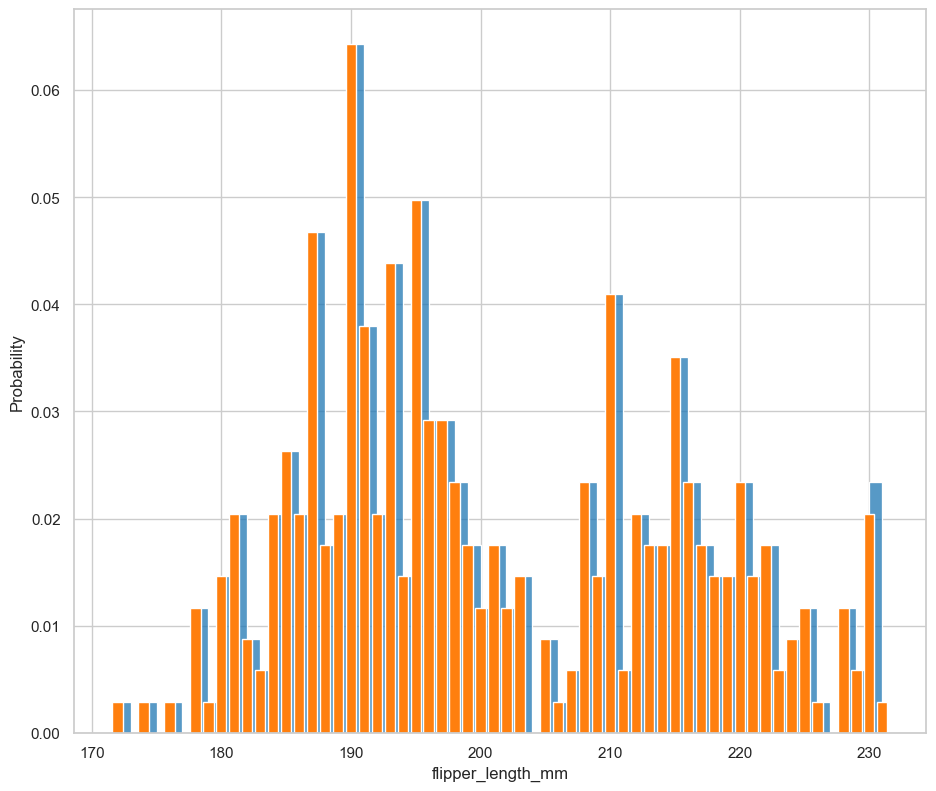

In [12]:
#Usando histplot()
sns.histplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability' #Ahora el eje y representara la probabilidad
)
#Usando empiricaldist
probabilidad = empiricaldist.Pmf.from_seq(
    preprocess_penguins_df.flipper_length_mm
)
probabilidad.bar() #Nos grafica la probabiliad
probabilidad(190) #Nos calcula la probabilidad de que la ala mida 190


Funcion de distribucion acumulada (CDFs)

200 0.5672514619883041


<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

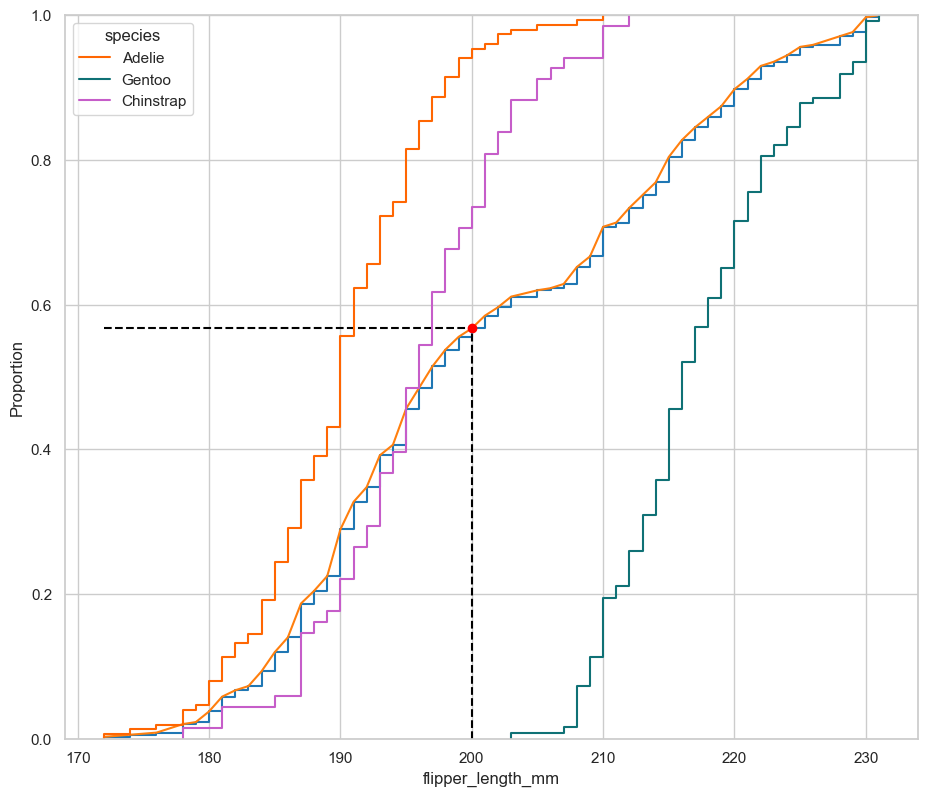

In [13]:
#Usando seaborn
sns.ecdfplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm' #Nos grafica la funcion
# La funcion que nos arroja es acumulada, por eso toma esa forma tan peculiar, pues el inicio es 0, y
# debido a que se va acumulando termina en 1
)

#Usando empiricaldist
cdf_probabilidad=empiricaldist.Cdf.from_seq(
    preprocess_penguins_df.flipper_length_mm,
    normalize=True
) 

cdf_probabilidad.plot()#Se ve de manera mas lisa no en step
cantidad = 200
probabilida = cdf_probabilidad.forward(cantidad)#Con forward calculamos la probabiliad
print(cantidad,probabilida)
#Con esta informacion podemos graficar lineas guia de la siguiente manera
plt.vlines(
    x=cantidad,
    ymin=0,
    ymax=probabilida,
    color='black',
    linestyle='--'
)
plt.hlines(
    y=probabilida,
    xmin=probabilidad.qs[0],
    #Probabilidad es la probabilidad pero com pmf
    xmax=cantidad,
    color='black',
    linestyle='--'
)
plt.plot(cantidad,probabilida,'ro')

#Graficar los 3 pinguinos
sns.ecdfplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    hue='species',#le indicamos que se enfoque en la variable especies
    palette=penguin_color
)


# Funciones de densidad de probabilidad

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\3905889850.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(


<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

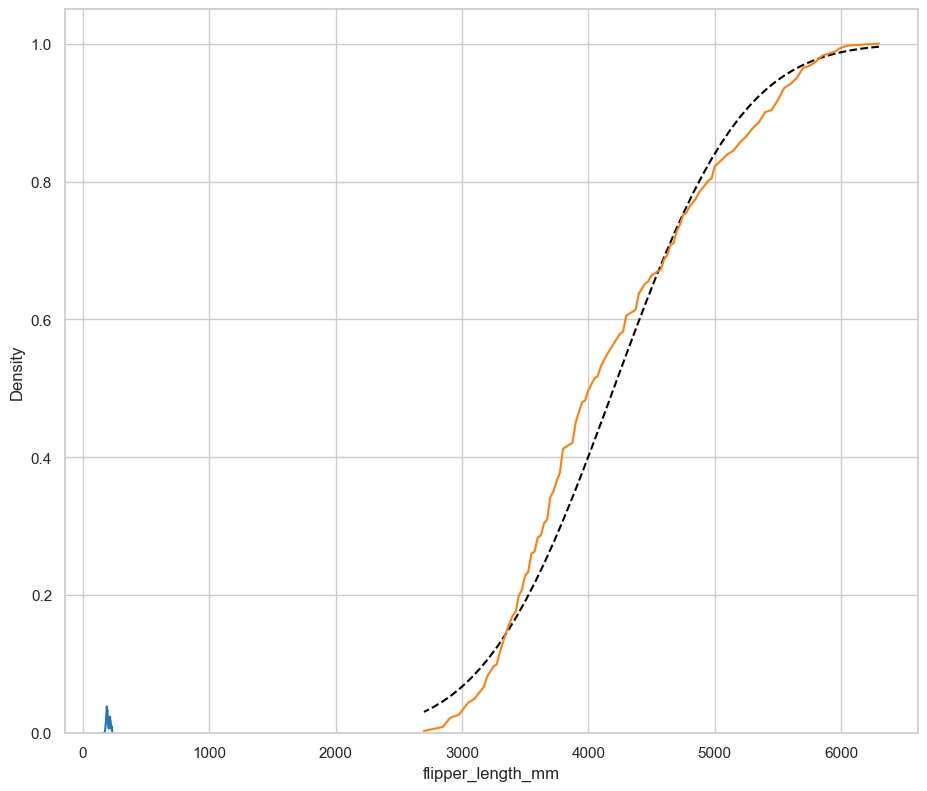

In [14]:
#Nos manda la forma de la distribucion
sns.kdeplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    bw=0.1 #Nos muestra me manera menos suave la distribucion, mientras mas disminuye vemos la silueta no solo de la funcion 
# en su totalidad, sino tambien de cada tabla, de igual manera si aumentamos mucho, nos aparecera una silueta muy divagada
)
estadisticas = preprocess_penguins_df.body_mass_g.describe()#Obtenemos las estadisticas de los pesos
xs=np.linspace(estadisticas['max'],estadisticas['min'])#Obtenemos el peso maximo y el peso minimo de los pinguinos('max' y 'min'son valores que nos da describe)
ys=scipy.stats.norm(estadisticas['mean'],estadisticas['std']).cdf(xs) #Nos manda la probabilidad para cada caso(ideal)
plt.plot(xs,ys,color='black',linestyle='--')

empiricaldist.Cdf.from_seq(
    preprocess_penguins_df.body_mass_g,
    normalize=True
).plot() #Los datos reales (la linea naranja)



<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

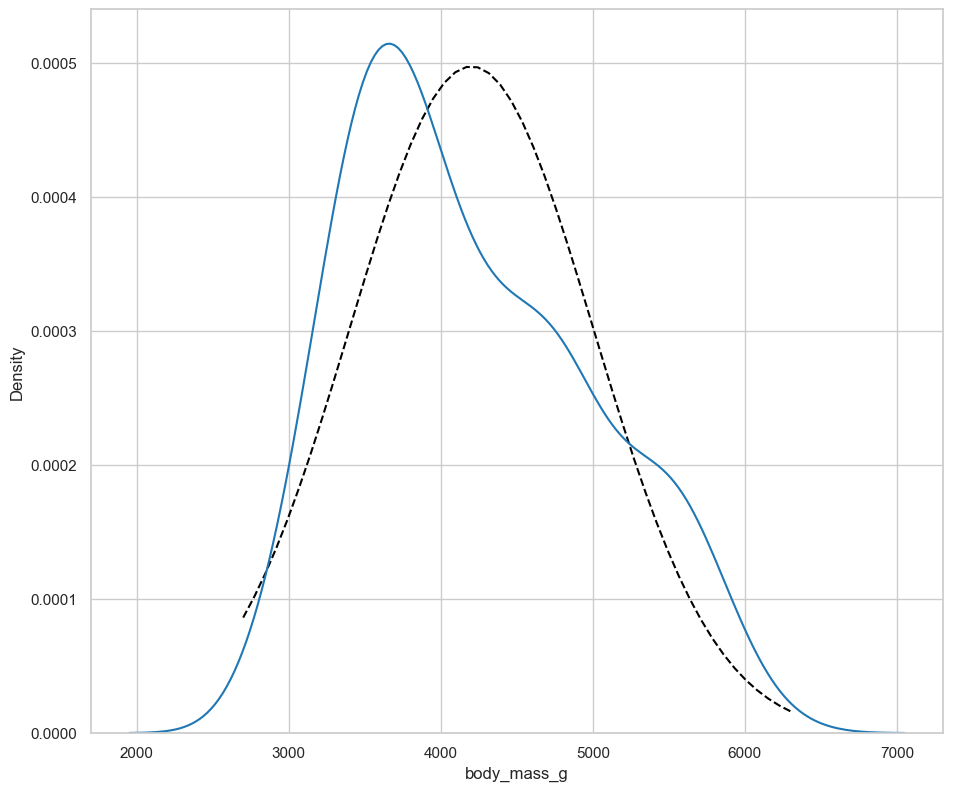

In [15]:
xs=np.linspace(estadisticas['min'],estadisticas['max'])
ys=scipy.stats.norm(estadisticas['mean'],estadisticas['std']).pdf(xs) 
plt.plot(xs,ys,color='black',linestyle='--')
sns.kdeplot(
    data=preprocess_penguins_df,
    x='body_mass_g'
)
#Los datos reales son los azules,  y la distribucion aleatoria son las linea negras
#Nuestra distribucion esta alinieada a la izquierda, no siguen una distribucion normal

# Ley de los grandes numeros

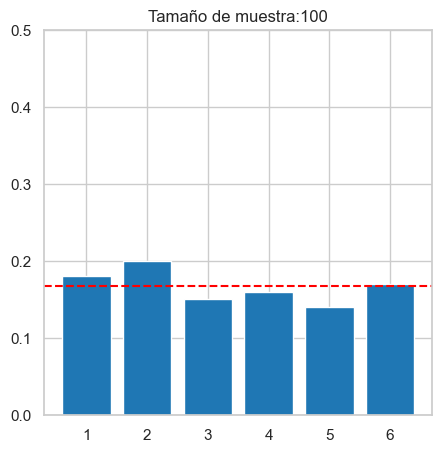

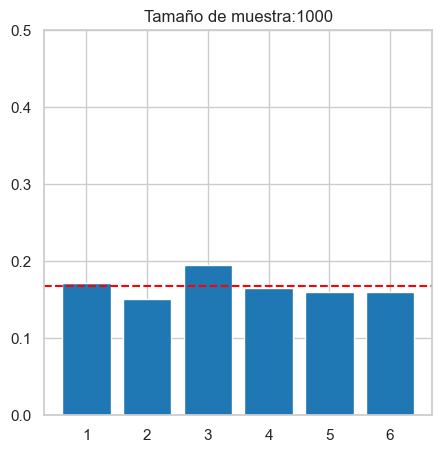

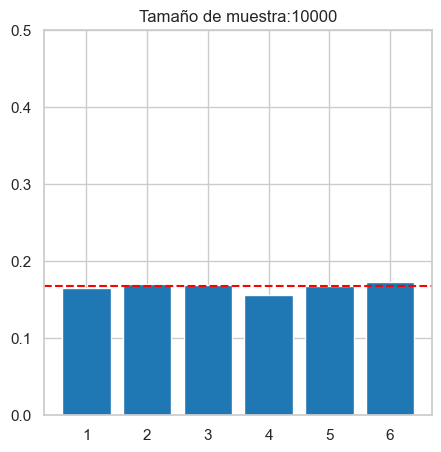

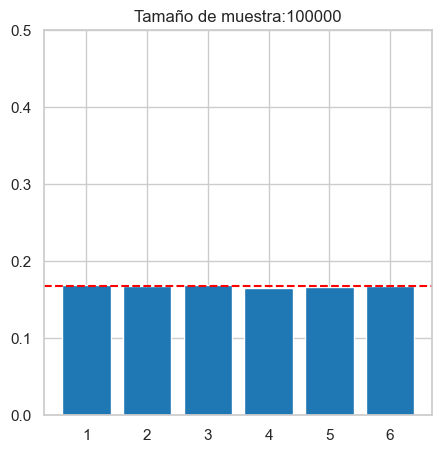

In [16]:
dado=empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
for Tamanio_Muestra in (1e2,1e3,1e4,1e5):#1e2 es 1 elevado ala dos osea 100
    Tamanio_Muestra=int(Tamanio_Muestra)
    valores=dado.sample(Tamanio_Muestra)
    Muestra_pmf=empiricaldist.Pmf.from_seq(valores)
    plt.figure(figsize=(5,5))
    Muestra_pmf.bar()
    plt.axhline(y=1/6,color='red',linestyle='--')
    plt.ylim([0,0.5])
    plt.title(f'Tamaño de muestra:{Tamanio_Muestra}')
    

# Teorema del limite central

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  muestra_df[nombre_muestra]=sex_numeric_sample
C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1506432774.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

El porcentaje promedio de pinguinas en la poblacion es de:50.4403%


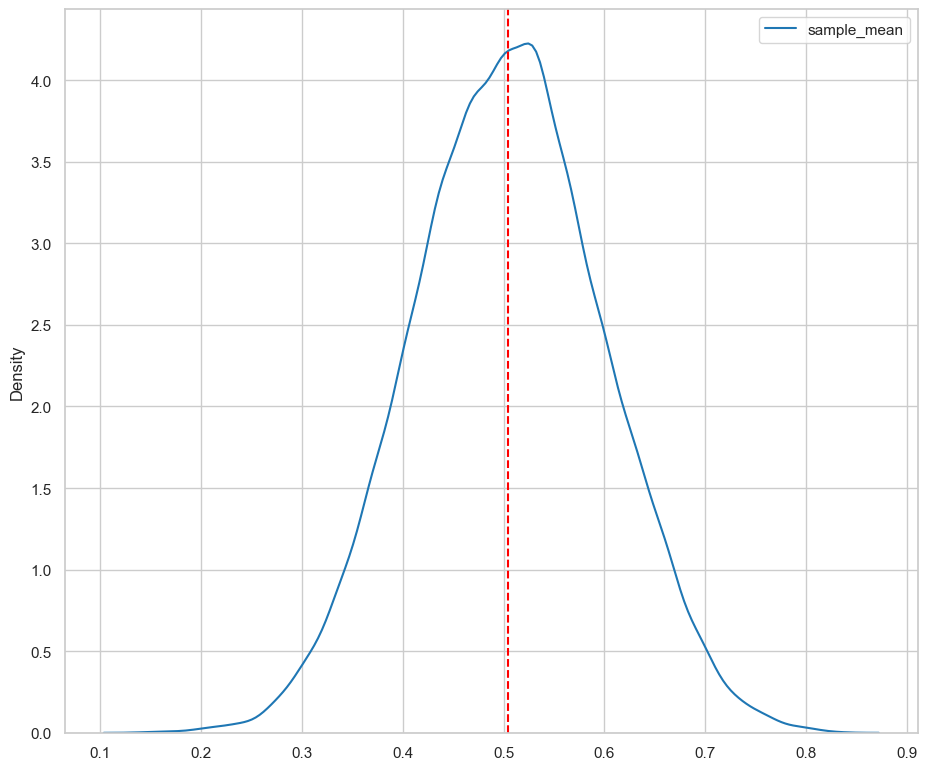

In [17]:
sex_numeric=preprocess_penguins_df.sex.replace(['male','female'],[1,0])#Reemplazamos male por 1 y female por 0 y guardamos esos datos en la variable sex_numeric
numero_muestra = 10000
tamanio_muestra=30
np.random.seed(42)
muestra_df = pd.DataFrame()
for i in range(1,numero_muestra+1):
    sex_numeric_sample=sex_numeric.sample(tamanio_muestra,replace=True).to_numpy()
    nombre_muestra=f'muestra_{i}'
    muestra_df[nombre_muestra]=sex_numeric_sample
    
promedio_poblacion_femeninas=muestra_df.mean().mean()
print(f'El porcentaje promedio de pinguinas en la poblacion es de:{promedio_poblacion_femeninas*100:.4f}%')#El :.4f controla la cantidad de numeros a la derecha del punto
#Graficamos
sample_means_binomial=pd.DataFrame(muestra_df.mean(),columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(),color='red',linestyle='--')

# Con todo este bloque de codigo podemos observar como entre mas es el numero de muestra,mas parecido es la densidad de probabilidad
# a una funcion normal

# Grafica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

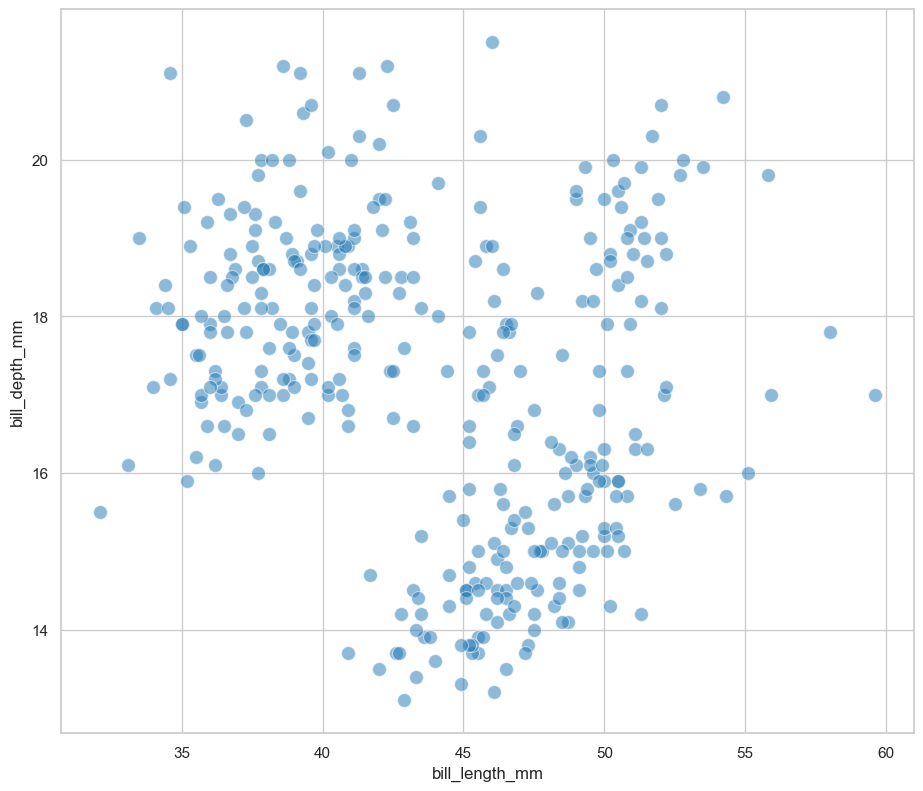

In [18]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=0.5, #Nos ayuda cuando tenemos muchos datos
    s=100 #El tamaño de nuestros puntos
)

Histograma 2D

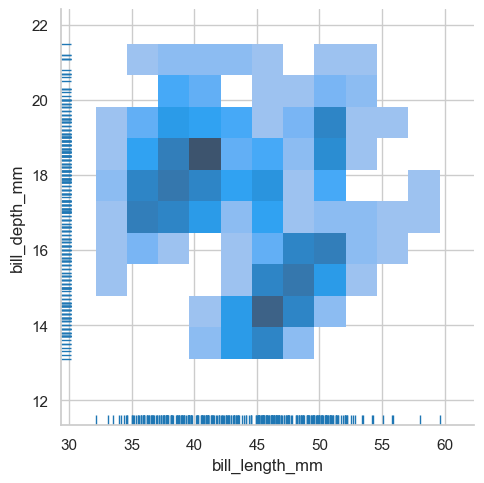

In [19]:
sns.displot(
  data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True
)

Histograma de densidad

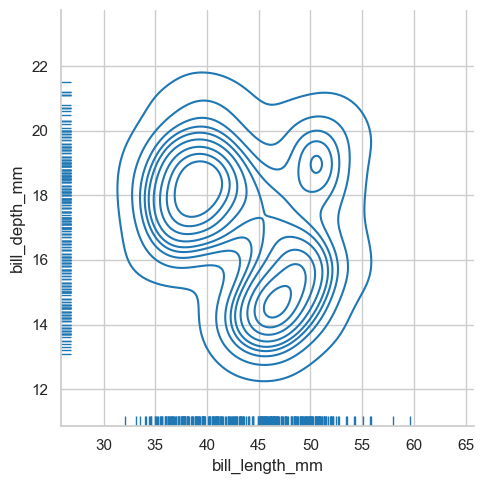

In [20]:
sns.displot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde'
)

Grafico mas histograma

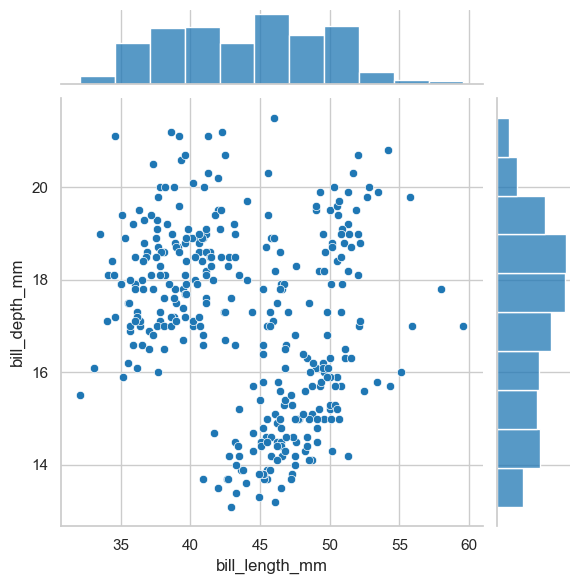

In [21]:
sns.jointplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
)

# Graficos de violin y boxplots (estableciendo relaciones)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

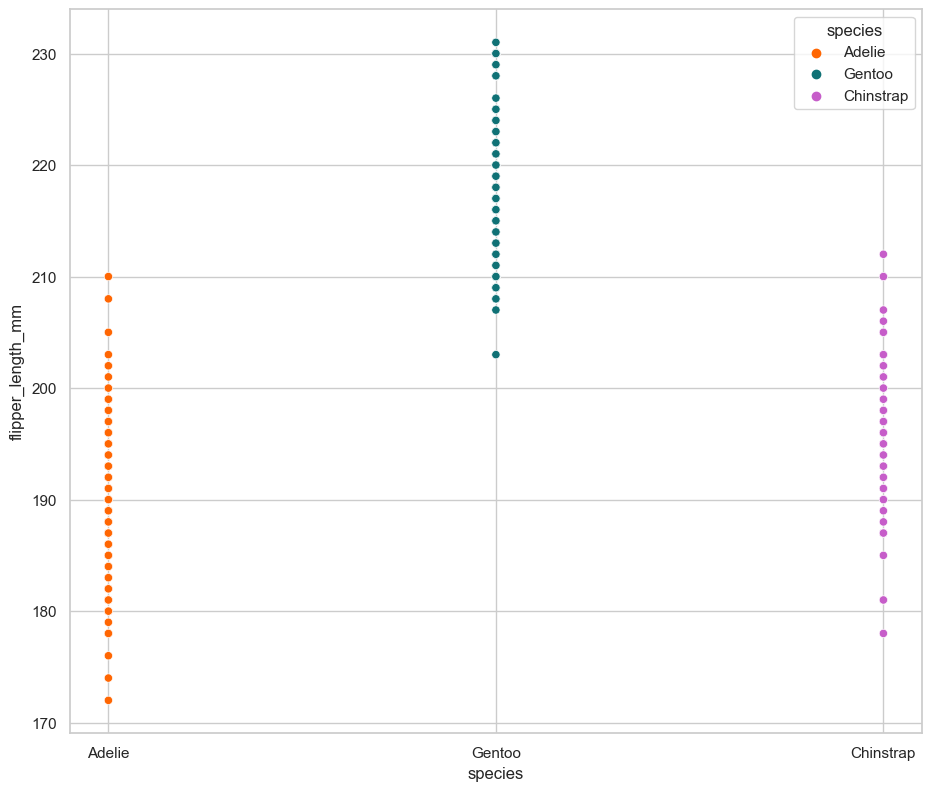

In [22]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
) #Esta grafica no tiene ruido


Grafica con ruido

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\2368329496.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(


<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

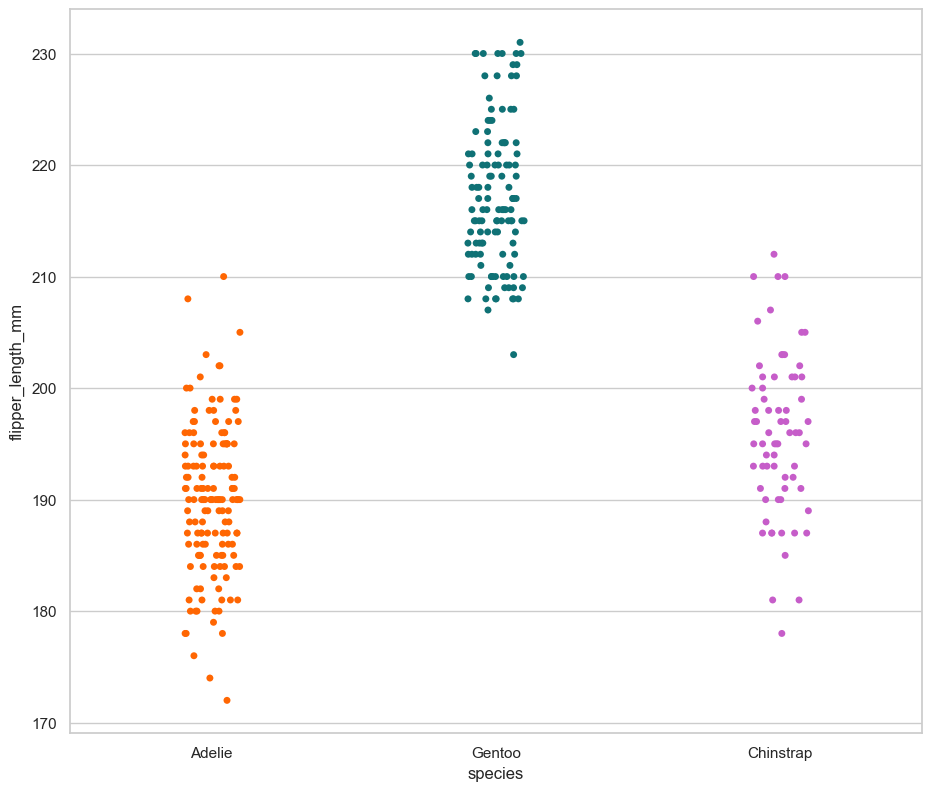

In [23]:
sns.stripplot(
    data=preprocess_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color

)

Creacion de boxplot

<AxesSubplot: xlabel='flipper_length_mm', ylabel='species'>

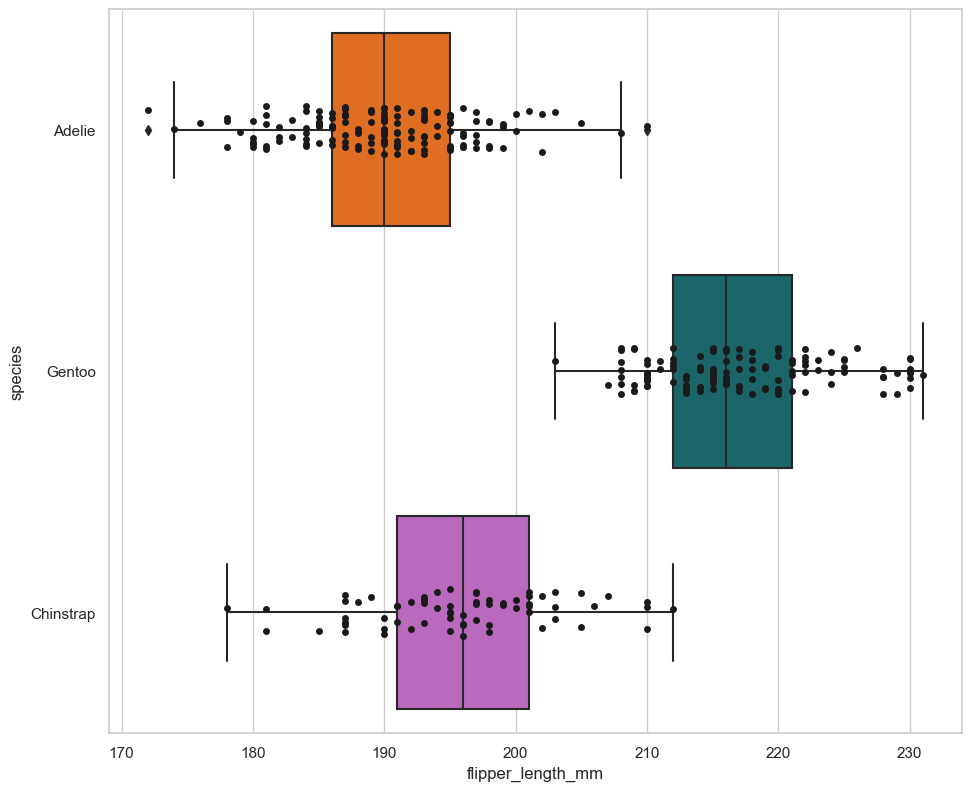

In [24]:
sns.boxplot(
    data=preprocess_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color
)
sns.stripplot(
    data=preprocess_penguins_df,
    y='species',
    x='flipper_length_mm',
    color='.1'
)

Grafica de Violin

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

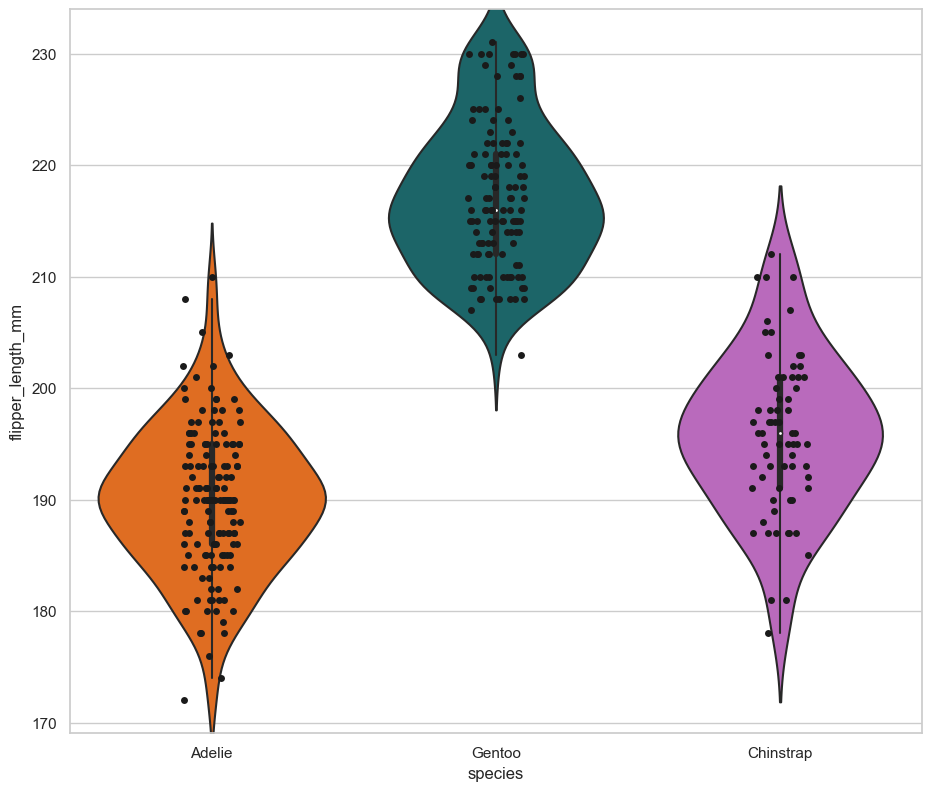

In [25]:
sns.violinplot(
    data=preprocess_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)
sns.stripplot(
    data=preprocess_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.1'
)

Swarmplot

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

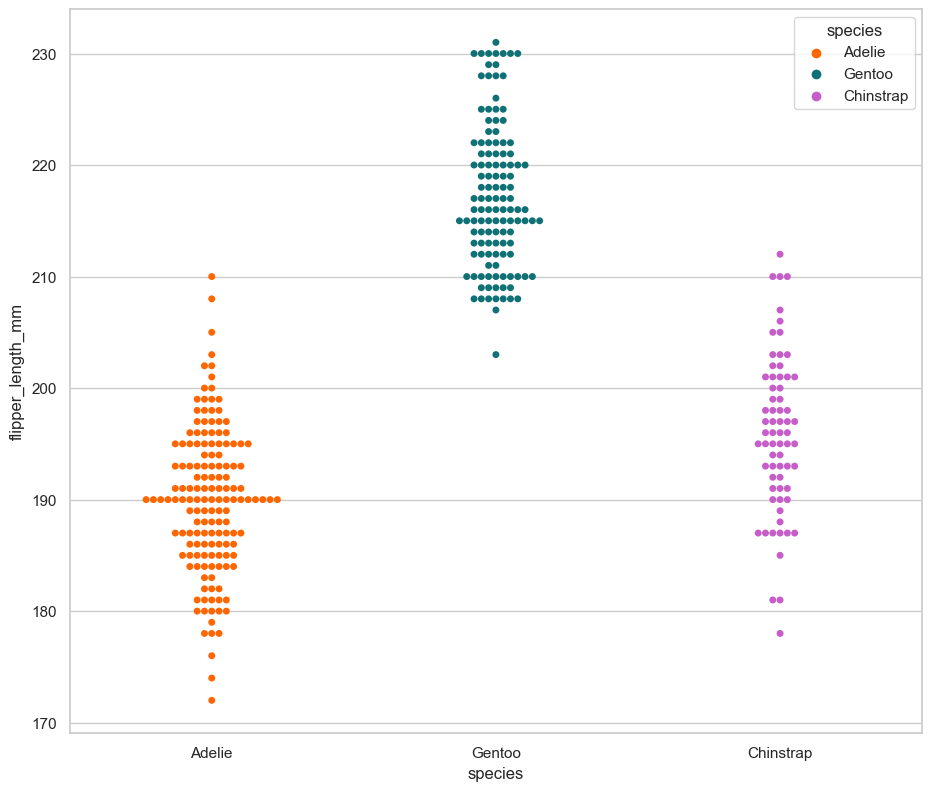

In [26]:
sns.swarmplot(
    data=preprocess_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

# Matrices de correlacion

¿Existe alguna relacion lineal entre algunas de nuestras variables?

In [27]:
preprocess_penguins_df.corr() 

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\3777225897.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   
year                     0.054545      -0.060354           0.169675   

                   body_mass_g      year  
bill_length_mm        0.595110  0.054545  
bill_depth_mm        -0.471916 -0.060354  
flipper_length_mm     0.871202  0.169675  
body_mass_g           1.000000  0.042209  
year                  0.042209  1.000000

Visualizacion de los coeficientes de correlacion

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1675772259.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprocess_penguins_df.corr(),


<AxesSubplot: >

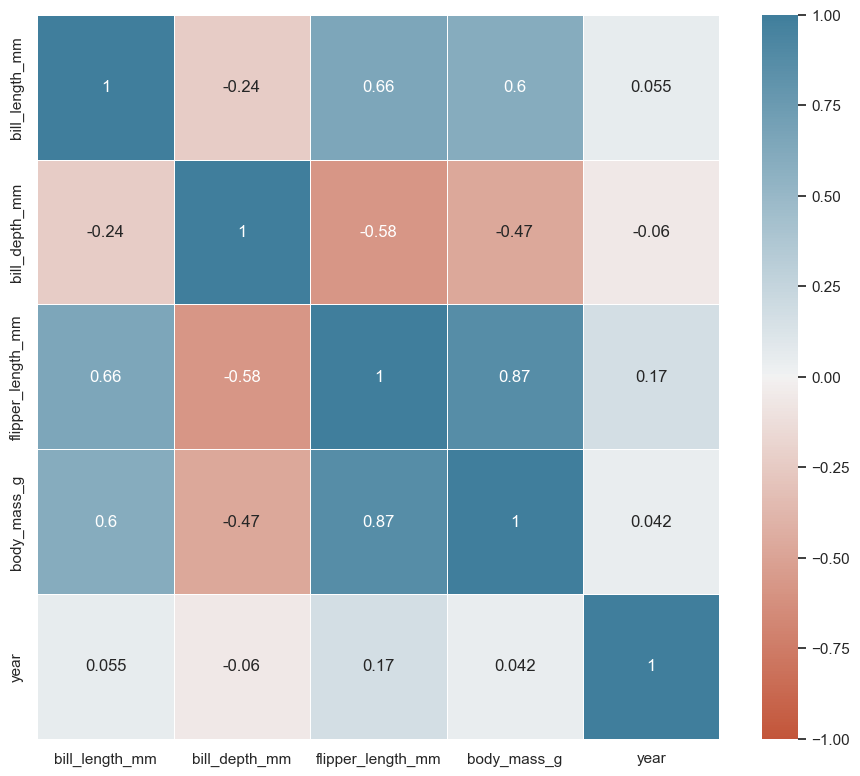

In [28]:
sns.heatmap(
    data=preprocess_penguins_df.corr(),
    center=0,
    vmin=-1, #Valor minimo que puede tomar la r de pearson
    vmax=1, #Valor maximo que puede tomar la r de pearson
    linewidths=.5,#Las lineas que separan los recuadros
    annot=True, #Nos manda el valor, si ponemos false no pondria el numero en medio
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

¿Como podemos representar una variable categorica con una numerica?

C:\Users\taqui\AppData\Local\Temp\ipykernel_8612\1788100124.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=preprocess_penguins_df_prueba.corr(),


<AxesSubplot: >

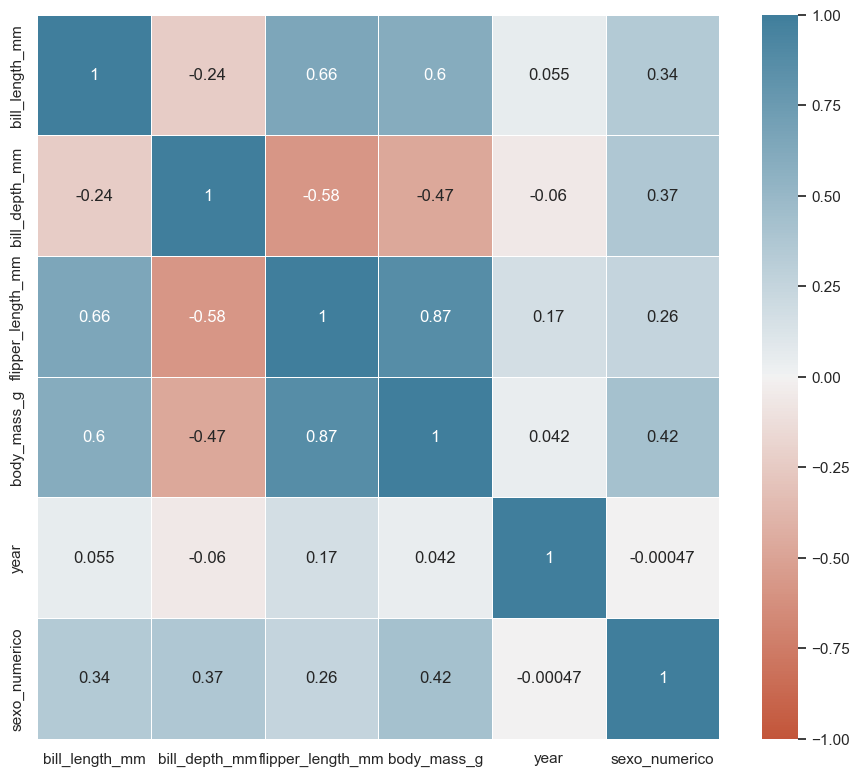

In [29]:


sns.heatmap(
    data=preprocess_penguins_df_prueba.corr(),
    center=0,
    vmin=-1,
    vmax=1, 
    linewidths=.5,
    annot=True, 
    cmap=sns.diverging_palette(20,230,as_cmap=True)
)

# Limitantes de los coeficientes de correlacion lineal

Solo nos ayuda a determinar la posible existencia de una correlacion linea; sin embargo, su auscencia no significa que no exista otro tipo de correlacion

array([[1.        , 0.91661865],
       [0.91661865, 1.        ]])

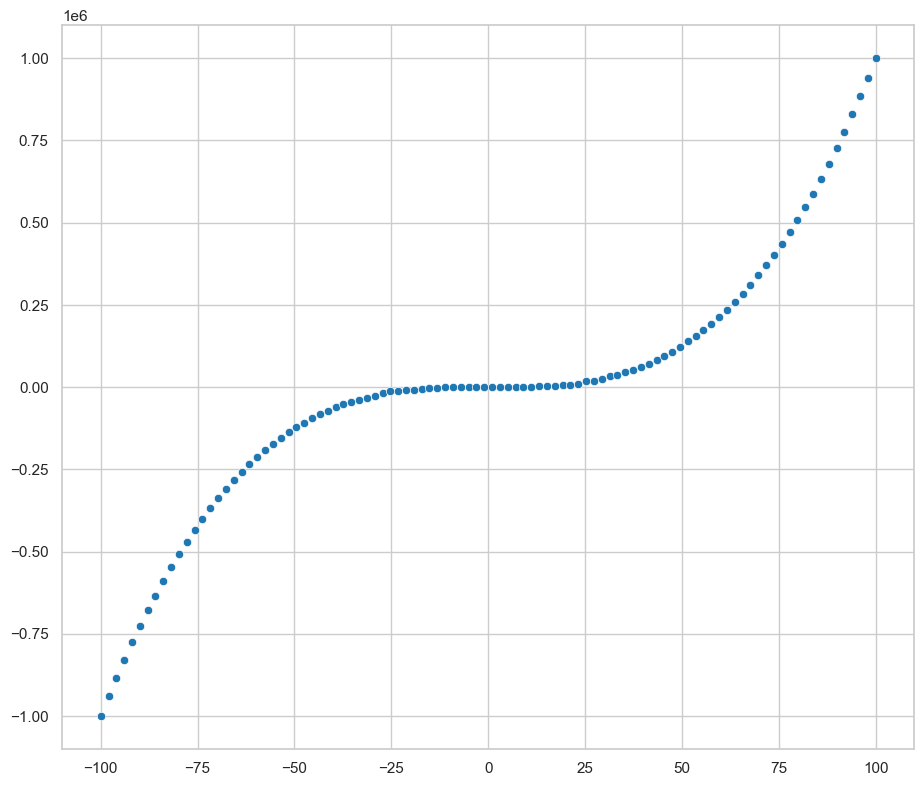

In [30]:
x=np.linspace(-100,100,100)
y=x**3 #Si lo elevamos al cuadrado el coeficiente de correlacion se hace muy debil
y+=np.random.normal(0,1e3,x.size)
sns.scatterplot(
    x=x,
    y=y
)
np.corrcoef(x,y) #Es como un dataframe que nos puede brindar numpy

Graficando la relacion de nuestros datos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

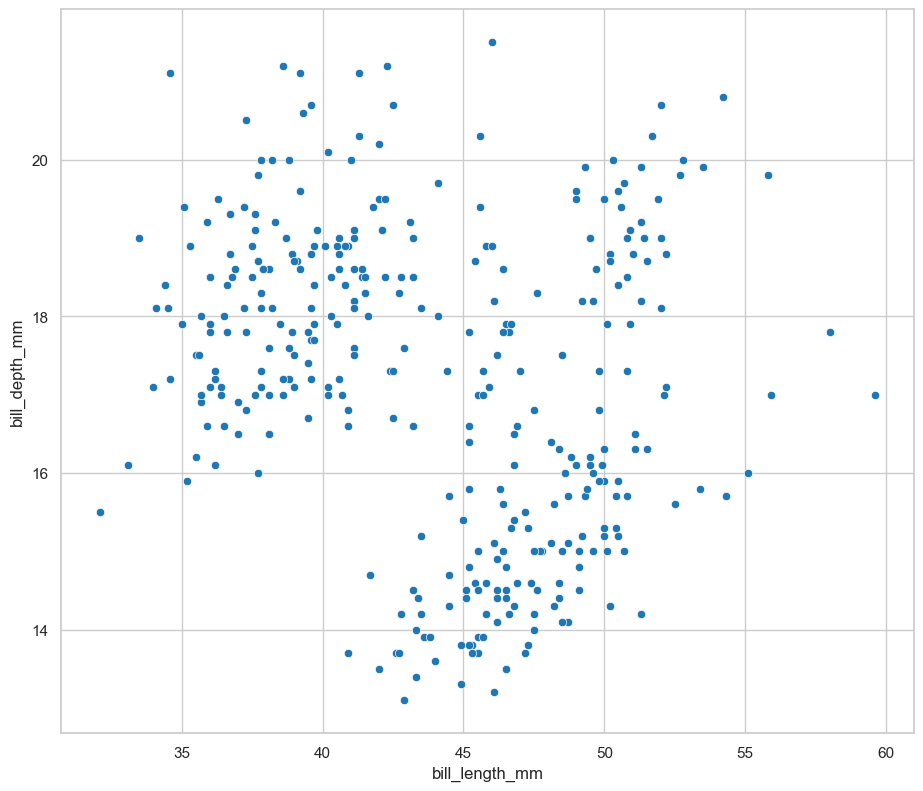

In [31]:
sns.scatterplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

El coeficiente de correlacion no nos habla del impacto de la relacion

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


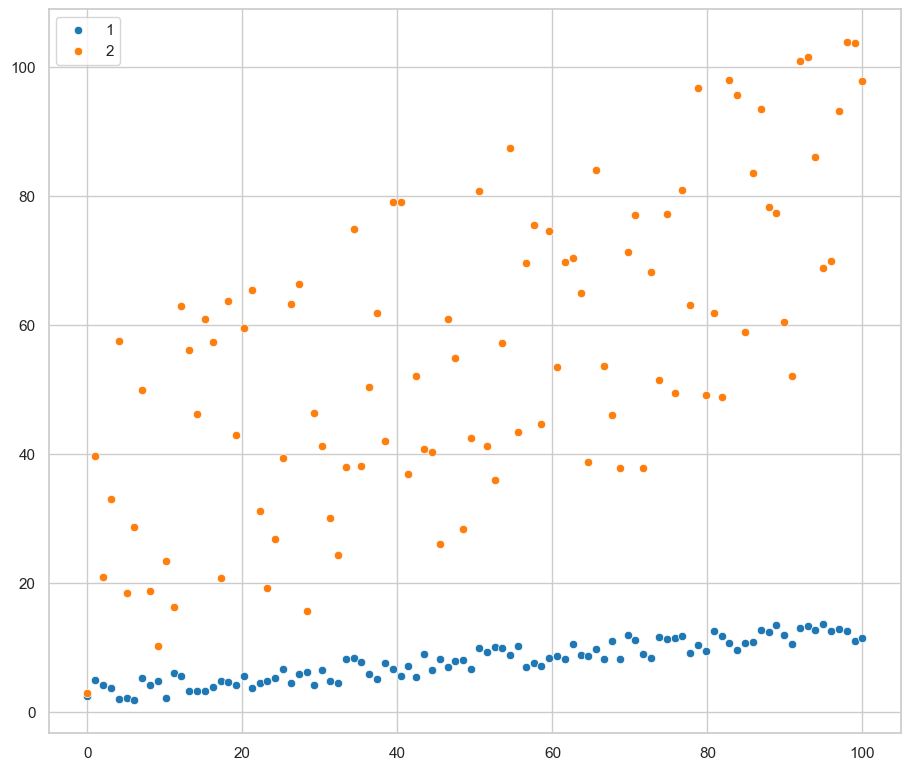

In [32]:
np.random.seed(42)
x_1 = np.linspace(0,100,100)
y_1 = 0.1* x_1 +3 + np.random.uniform(-2,2,size=x_1.size)

sns.scatterplot(x=x_1, y=y_1)


x_2 = np.linspace(0,100,100)
y_2 = 0.5* x_1 +1 + np.random.uniform(0,60,size=x_2.size)

sns.scatterplot(x=x_2, y=y_2)

plt.legend(["1","2"])

print(np.corrcoef(x_1,y_1))
print(np.corrcoef(x_2,y_2))
# Aqui podemos ver, como los puntos naranjas tienen un impacto en el valor de las y alta, pero no se puede apreciar de la mejor
# manera, ya que el impacto que tiene es muy poco comparado con la otra (azul comparada con la naranja), en otras palabras
# es util visualizar los impactos, dejarno guiar por el puro coeficiente de correlacion nos podria hacer caer en errores graves

# Analisis de regresion simple

In [33]:
res_1=scipy.stats.linregress(x=x_1,y=y_1)#Con la funcion linregress obtenemos una regresion lineal
res_2=scipy.stats.linregress(x=x_2,y=y_2)
print(res_1)
# Los datos que nos arrojan seran:
#     slope->Nos dice que tan inclinada esta nuestra linea(el efecto que tiene esta correlacion)
#     intercept->En donde se corta nuestro eje de las y
#     rvalue->Cuantos de la variabilidad de nuestros datos estamos calculando con la regresion lineal
#     pvalue->Nos dice si es significativo

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)


Graficando la regresion lineal

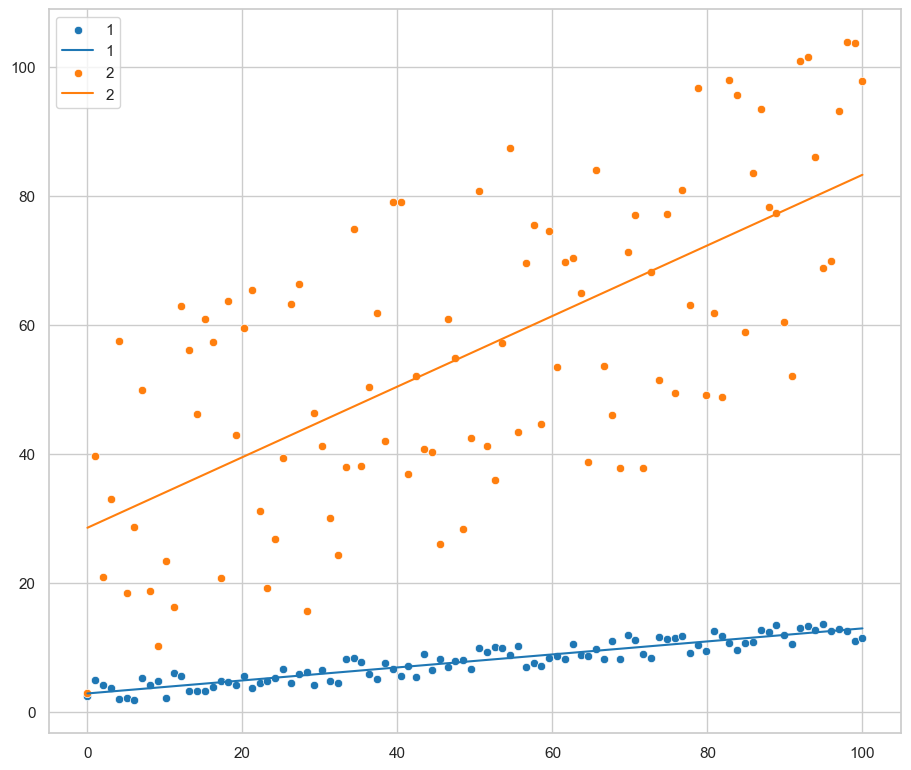

In [34]:
sns.scatterplot(x=x_1, y=y_1)
fx_1=np.array([x_1.min(),x_1.max()])
fy_1=res_1.intercept+res_1.slope*fx_1
plt.plot(fx_1,fy_1) #Graficamos la linea azul

sns.scatterplot(x=x_2, y=y_2)
fx_2=np.array([x_2.min(),x_2.max()])
fy_2=res_2.intercept+res_2.slope*fx_2
plt.plot(fx_2,fy_2)

plt.legend(["1","1","2","2"]) 
#De esta manera podremos ver de mejor manera el impacto

Graficando con seaborn.
Como pudimos ver, hay variables que no tienen nada de relacion entre si, como el la anchura y profundidad del pico

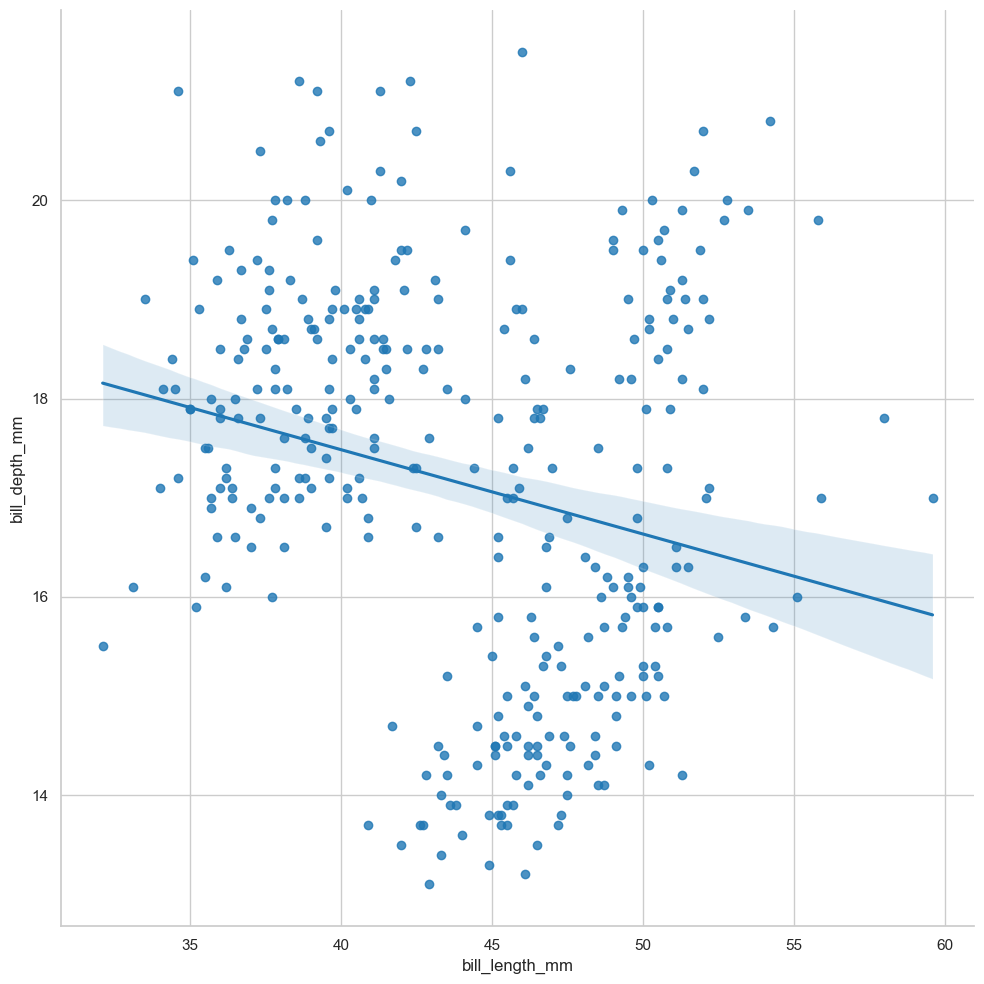

In [35]:
sns.lmplot(
    data=preprocess_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

# Limitaciones del analisis de regresion lineal simple

La regresion lineal no es simetrica

In [36]:
processed_penguins_df=(preprocess_penguins_df.dropna())
#Si no eliminamos todos los valores nulos del dataframe, la regresion lineal se truncara, y nos mandara TODOS los valores como nulos
x=processed_penguins_df.bill_length_mm
y=processed_penguins_df.bill_depth_mm
res_x_y=scipy.stats.linregress(x=x,y=y)
res_y_x=scipy.stats.linregress(x=y,y=x)
#Si comparamos los datos veremos que no son iguales, osea, no son simetricos
print(f'x contra y : {res_x_y}\n\ny contra x : {res_y_x}')

x contra y : LinregressResult(slope=-0.08232675339862282, intercept=20.78664866843383, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)

y contra x : LinregressResult(slope=-0.6349051704195025, intercept=54.89085424504756, rvalue=-0.22862563591302917, pvalue=2.5282897209442967e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


Grafico de resultados x contra y

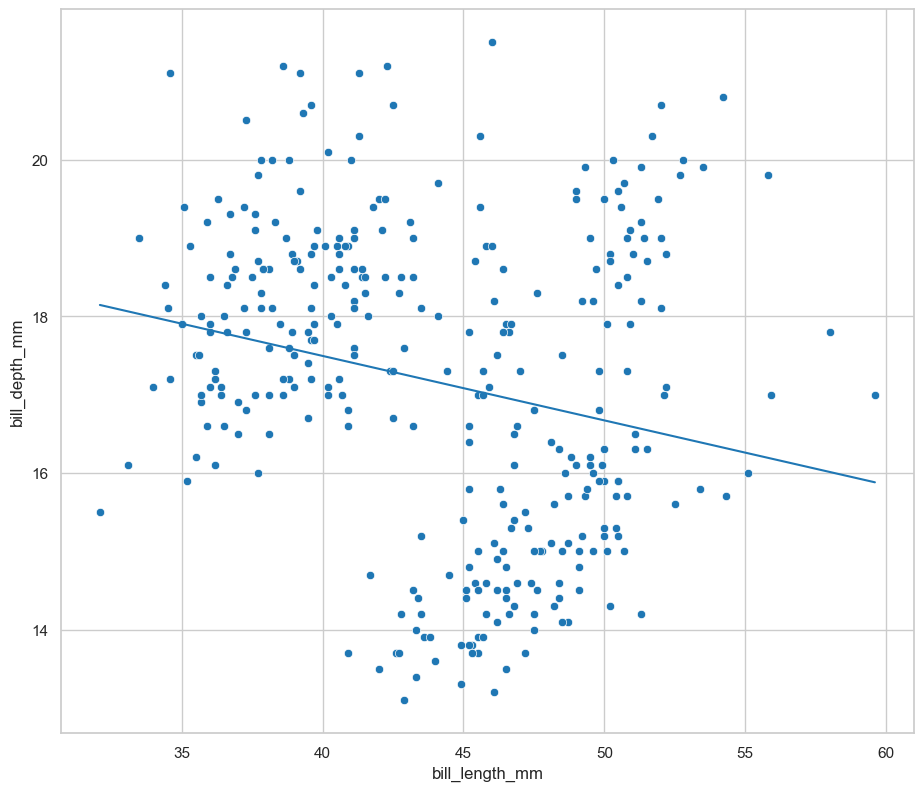

In [37]:
sns.scatterplot(x=x,y=y)
fx_1=np.array([x.min(),x.max()])
fy_1=res_x_y.intercept+res_x_y.slope*fx_1
plt.plot(fx_1,fy_1)

Grafico de resultados y contra x

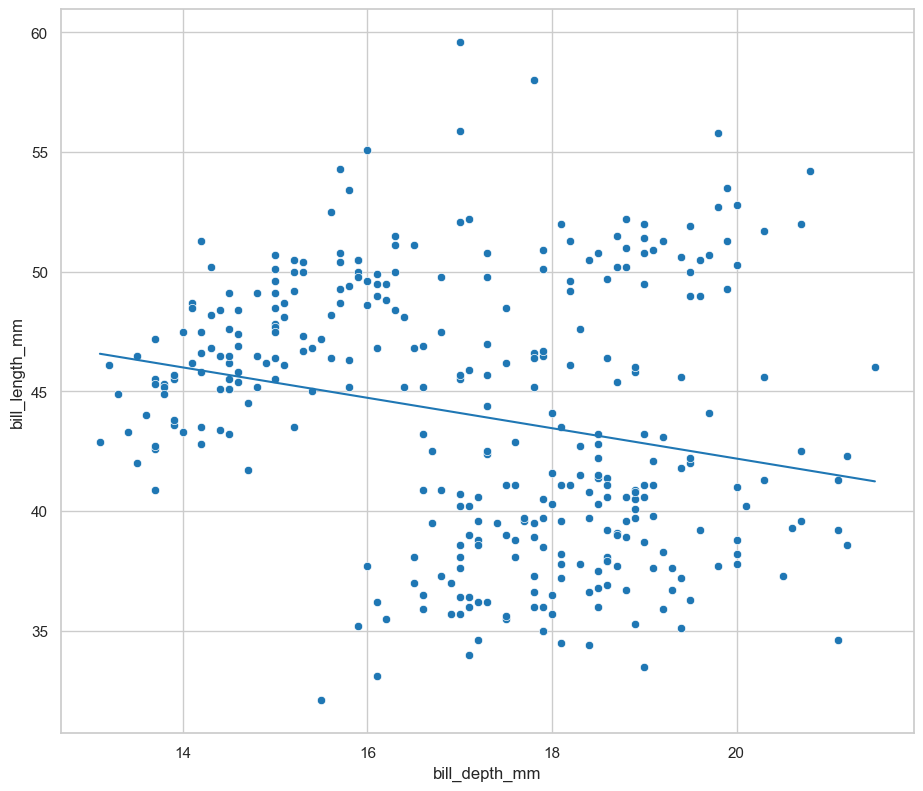

In [38]:
sns.scatterplot(x=y,y=x)
fx_2=np.array([y.min(),y.max()])
fy_2=res_y_x.intercept+res_y_x.slope*fx_2
plt.plot(fx_2,fy_2)

La regresion no nos dice nada sobre causalidad, pero existen herramientas para separar las relaciones entre multiples variables

In [39]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',#como se comporta la longitud de pico respecto a la altura del pico
        data=processed_penguins_df
    )
    .fit()
    .params
)#Nos arroja el intercepto que es donde se corta el eje de las y
# Tambien nos arrojara algo muy interesante y es bill_depth_mm   -0.634905, que significa que por cada unidad de cambio en la 
# profunidad de mi pico estaria esperando un  -0.634905 en la longitud del pico

#Tambien podemos hacer lo contrario
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=processed_penguins_df
    )
    .fit()
    .params
)
#Ahora nos dira que por cada unidad de cambio en la longitud del pico,  estariamos esperando un -0.082327 en la profundidad del pico
#Todo esto nos dice el cambio de una variable respecto a la otra, en la formula podemos agregar distintas variables

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

# Analisis de regresion multiple

Imaginemos que tenemos que pesar los pinguinos que tenemos, pero no tenemos bascula ¿Hay acaso alguna relacion en mis datos que esten conectados con la variable peso? De esta forma con la ayuda de tener las otras variables, podria saber el peso de mi pinguino sin necesidad de una bascula. A continuacion escribiremos varios modelos para ir viendo como es que los datos se hacen mas claros mientras mas variables metemos a la formula

In [61]:
modelo_1=(
    smf.ols( 
        formula='body_mass_g ~ bill_length_mm',
        data=processed_penguins_df
    ).fit() #Pendiente de longitud del pico = 86.7918
)
modelo_2=(
    smf.ols(
        formula='body_mass_g ~ bill_length_mm + flipper_length_mm + bill_depth_mm',
        data=processed_penguins_df
        
    ).fit()
    
)
modelo_2.summary() #Bill length = 3.2929
#Todas las pendientes se ajustan
#Dentro de los datos que nos arroja el R-squred es de los mas importantes, entre mas se acerque a 1 mejor, porque ajusta mas la 
#variabilidad
modelo_3=(
    smf.ols(
        formula='body_mass_g ~  flipper_length_mm + C(sex) ',
        data=processed_penguins_df
        
    ).fit()
    
)
modelo_3.summary() #Con este modelo obtenemos un R-squared de .805

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.53e-118
Time:                        07:56:24   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como consejo antes de continuar, a la hora de hacer estos modelos debemos saber que variabales son covenientes combinar, recordemos las matrices de correlacion, como nos mostraba ya que algunas variables estaban fuertemente relacionadas entre si, estas variables nos ayudaran muchisimo a la hora de hacer los modelos (las variables que estaban relacionadas con la variable que estabamos estudiando(el peso del pinguino)),pero si combinamos otros valores que no tienen ninguna o una relacion negativa, podria estropearnos los datos; por eso es muy importante saber que variables agregamos a los modelos, no solo se trata de cuantas mas variables agreguemos mejor

#  Visualizando los resultados

Creacion de la tabla de resultados

In [62]:
Resultados_Modelos=pd.DataFrame(
    dict(
        valor_actual=processed_penguins_df.body_mass_g,
        prediccion_modelo1=modelo_1.predict(),#predict nos arroja un array con predicciones
        prediccion_modelo2=modelo_2.predict(),
        prediccion_modelo3=modelo_3.predict(),
        especies=processed_penguins_df.species,
        sexo=processed_penguins_df.sex
    )
)
Resultados_Modelos.head()

valor_actual  prediccion_modelo1  prediccion_modelo2  prediccion_modelo3  \
0        3750.0         3782.402961         3204.761227         3441.323750   
1        3800.0         3817.119665         3436.701722         3328.384372   
2        3250.0         3886.553073         3906.897032         3751.223949   
4        3450.0         3574.102738         3816.705772         3657.259599   
5        3650.0         3799.761313         3696.168128         3864.163327   

  especies    sexo  
0   Adelie    male  
1   Adelie  female  
2   Adelie  female  
4   Adelie  female  
5   Adelie    male

<AxesSubplot: ylabel='Proportion'>

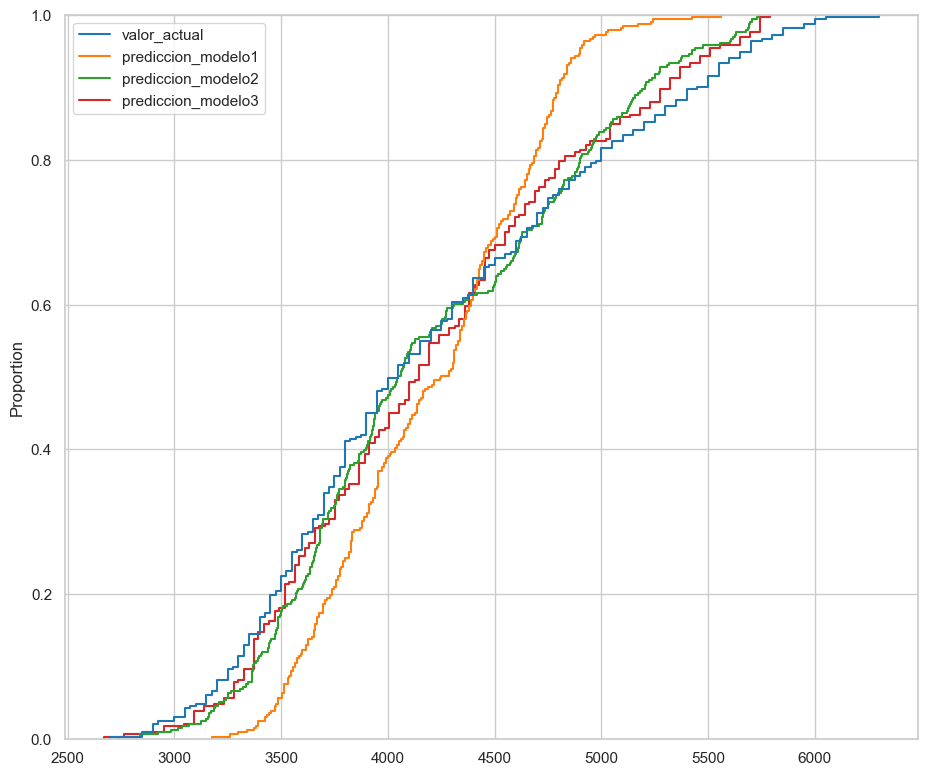

In [66]:
sns.ecdfplot(
    data=Resultados_Modelos
)


Tambien podemos escoger datos en particular

<AxesSubplot: ylabel='Proportion'>

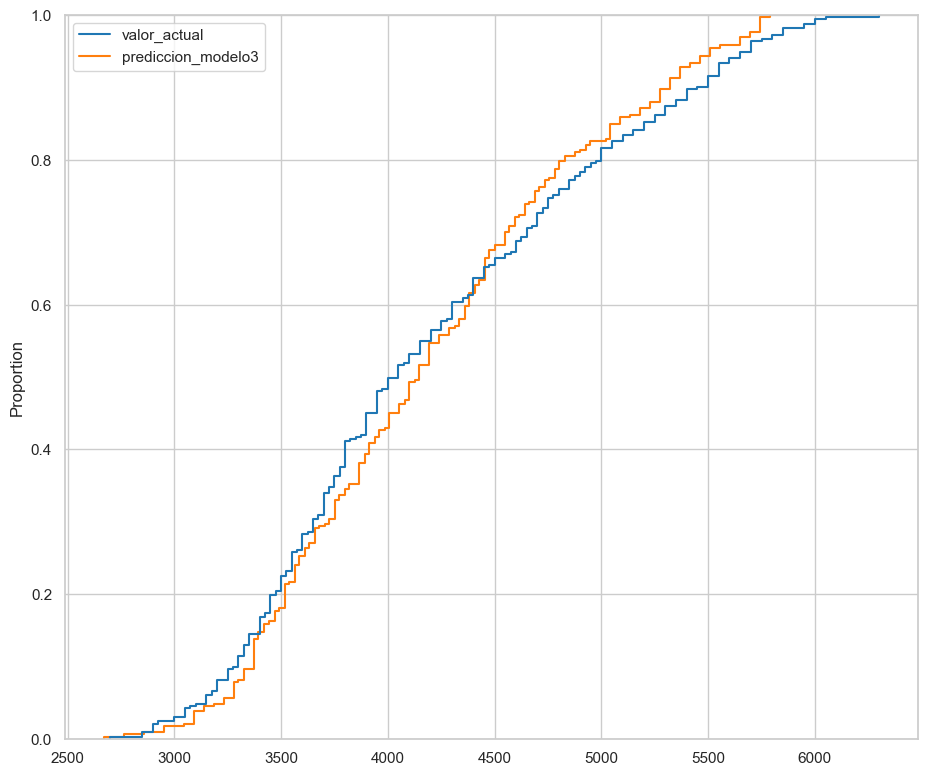

In [69]:
sns.ecdfplot(
    data=Resultados_Modelos.select_columns(['valor_actual','prediccion_modelo3'])
)

PDFs

<AxesSubplot: ylabel='Density'>

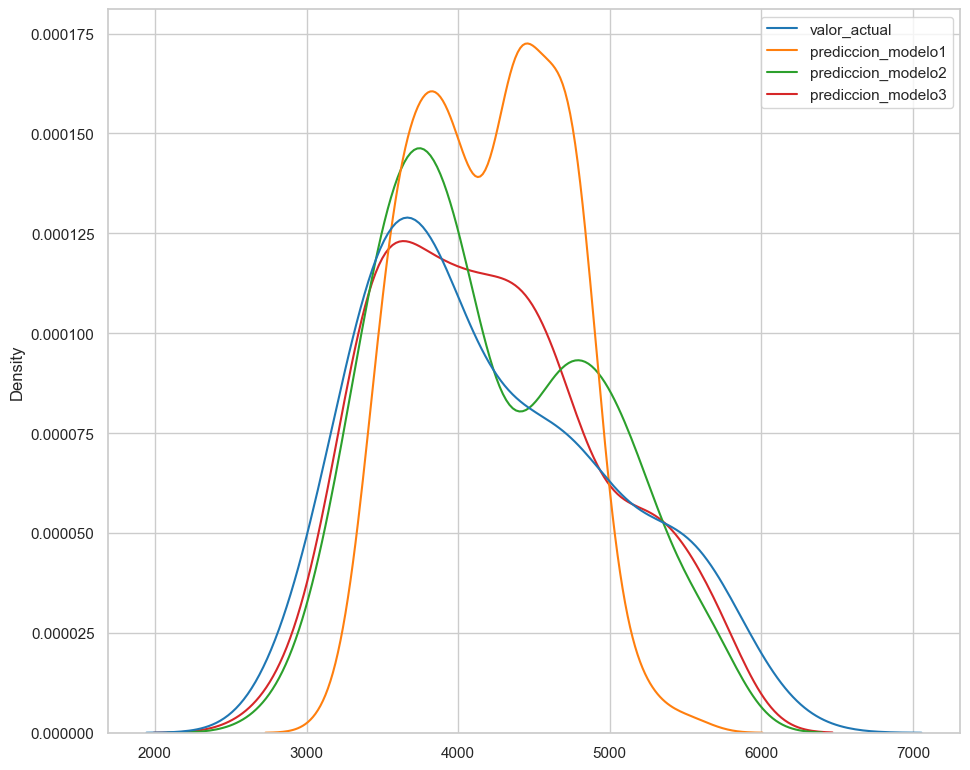

In [72]:
sns.kdeplot(
    data=Resultados_Modelos
)#Viendo la densidad de los modelos

<AxesSubplot: ylabel='Density'>

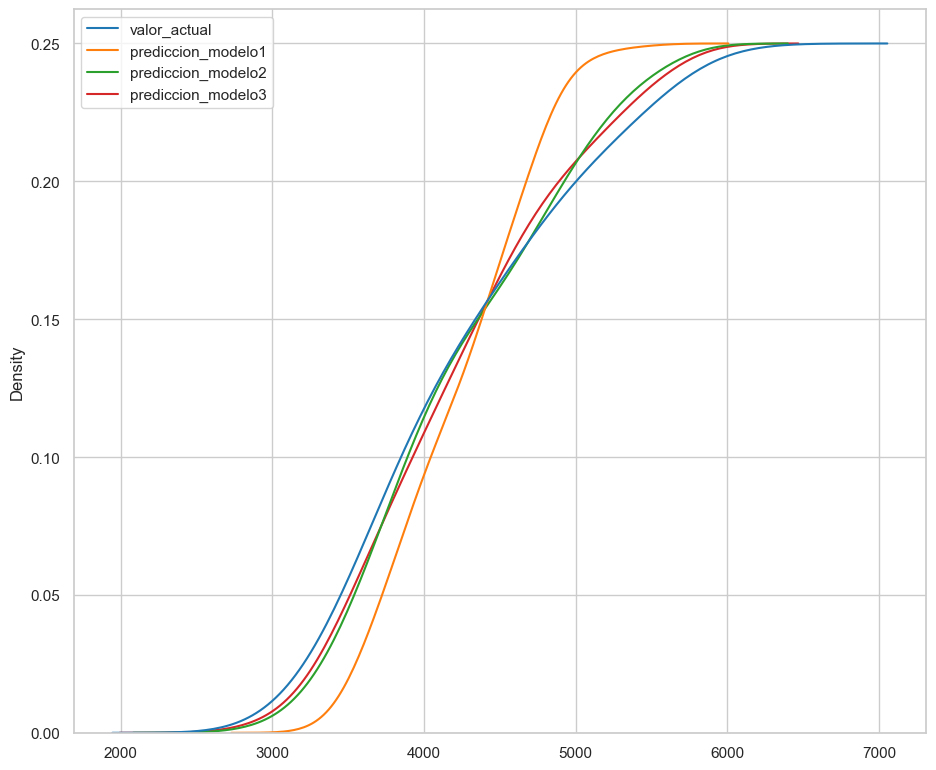

In [74]:
sns.kdeplot(
    data=Resultados_Modelos,
    cumulative=True
)

¿Que pudimos hacer antes de hacer los modelos? Antes de hacer los modelos debemos explorar la relacion entre multiples variables, y posteriormente, usar los modelos

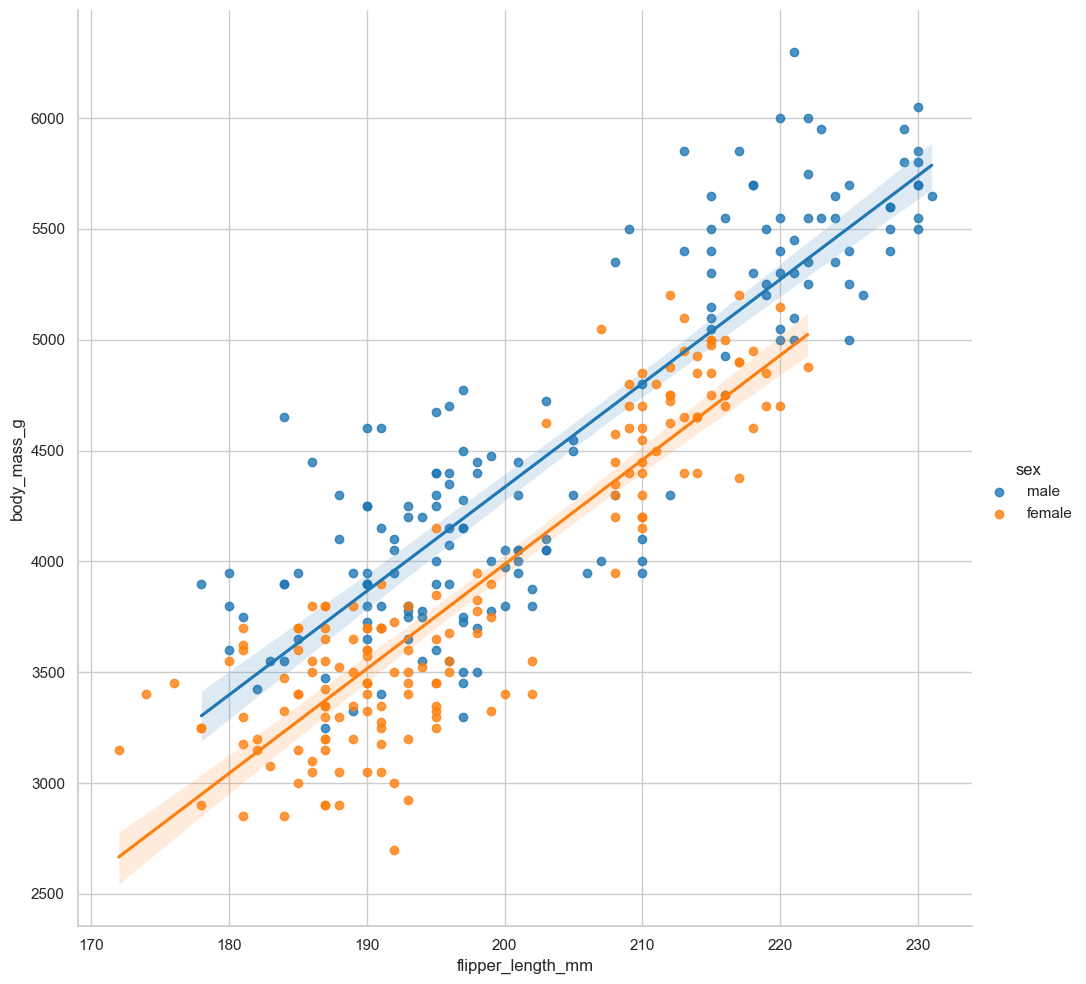

In [76]:
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',#Que haga dos lineas, una por cada sexo
    height=10
)

# Analisis de regresion logistica

¿Podemos crear un modelo que nos ayude a definir si un piguino es macho o hembra?

In [81]:
processed_penguins_df=(# pasaremos el sexo de categorico a numerico
    processed_penguins_df
    .assign(
        sexo_numerico=lambda df: df.sex.replace(['female','male'],[0,1])
    ) 
)
smf.logit(
    formula='sexo_numerico~flipper_length_mm+bill_length_mm+bill_depth_mm+C(island)',#C(island) es categorica, por eso va dentro
                                                                                #de C()
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          sexo_numerico   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.4793
Time:                        08:25:01   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

Los valores que hemos tenido no nos arrojaran un R-squared como antes, en su caso nos arrojara un Coef en cada variable,  si es positva es probable que suceda(que haya correlacion) si es negativa no es probable que suceda(no hay correlacion)

¿Podemos definir un modelo que nos ayude a identificar si un pinguino pertenece a determinada especie?

In [83]:
processed_penguins_df=(
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie','Gentoo','Chinstrap'],[1,0,0]))    
)
processed_penguins_df.head(2)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  year  sexo_numerico  is_adelie  
0       3750.0    male  2007              1          1  
1       3800.0  female  2007              0          1

In [86]:
modelo_es_adelie=smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit()
modelo_es_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

La interpretacion que podemos dar a los datos arrojados es: Es mas probable que un pinguino adelie sea macho a que sea hembra.
Es menos probable que este pinguino tenga un ala mas grande

In [89]:
Prediccion_es_adelie=pd.DataFrame(
    dict(
        actual_adelie=processed_penguins_df.is_adelie,
        predicted_values=modelo_es_adelie.predict().round()
    )
)

Visualizar la prediccion a traves de una matriz de confussion

In [91]:
print(
    sklearn.metrics.confusion_matrix(
        Prediccion_es_adelie.actual_adelie,
        Prediccion_es_adelie.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    Prediccion_es_adelie.actual_adelie,
    Prediccion_es_adelie.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

La forma de interpretar los valores arrojados es: tuve 151 pinguinos que eran machos y los clasifique como machos, tuve 36 pinguinos que eran machos pero los clasifique como hembras, asi sucesivamente con los de abajo,  a la derecha son las hembras que clasifique como hembras,  y a la izquierda las hembras que clasifique como machos

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

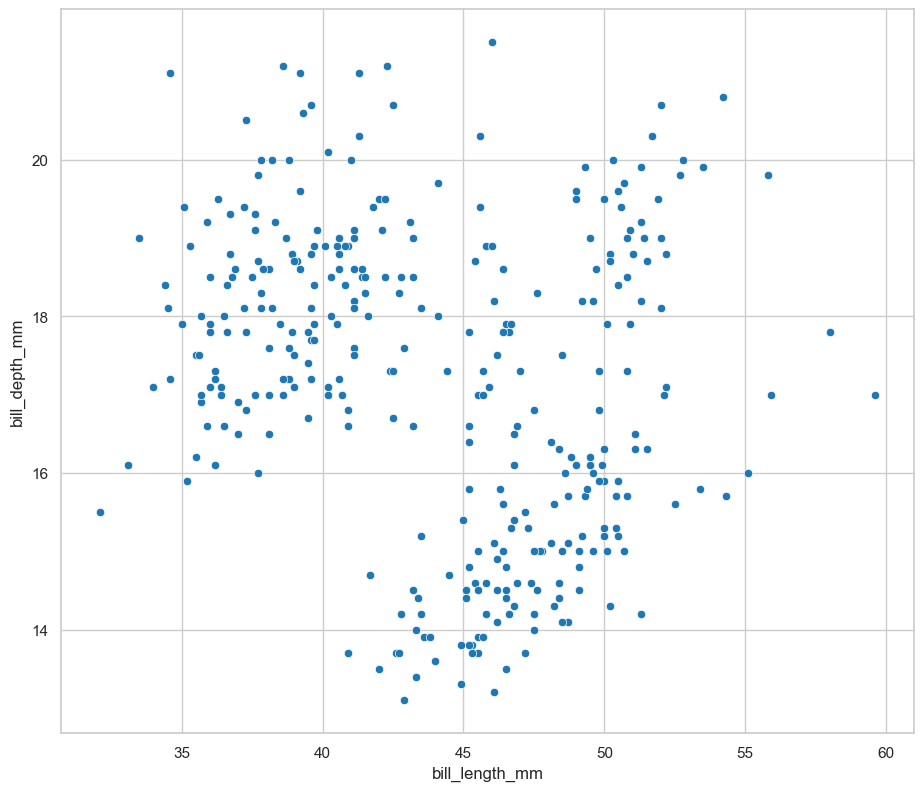

In [93]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

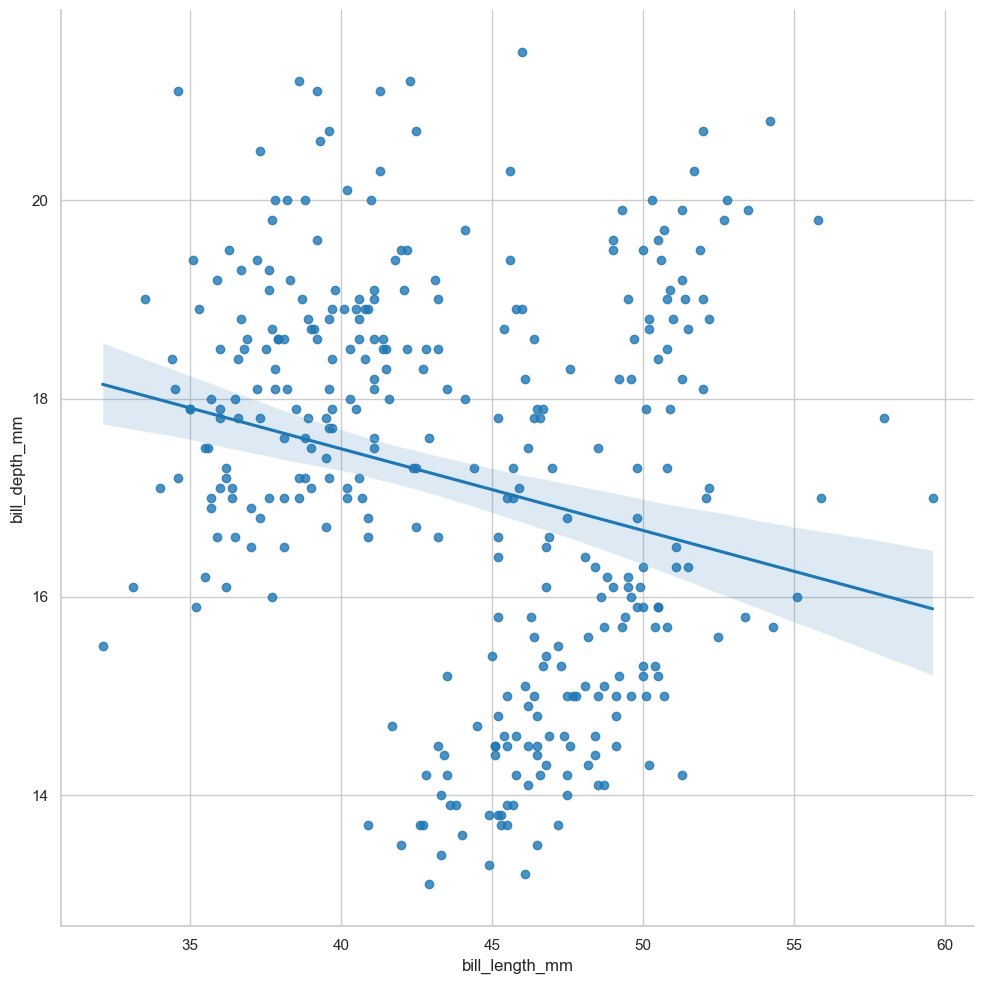

In [97]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)


Vemos una relacion negativa, segun el grafico, entre mayor el pico menor la produndidad, raro ¿no? veamos que pasa si le agregamos otra variable

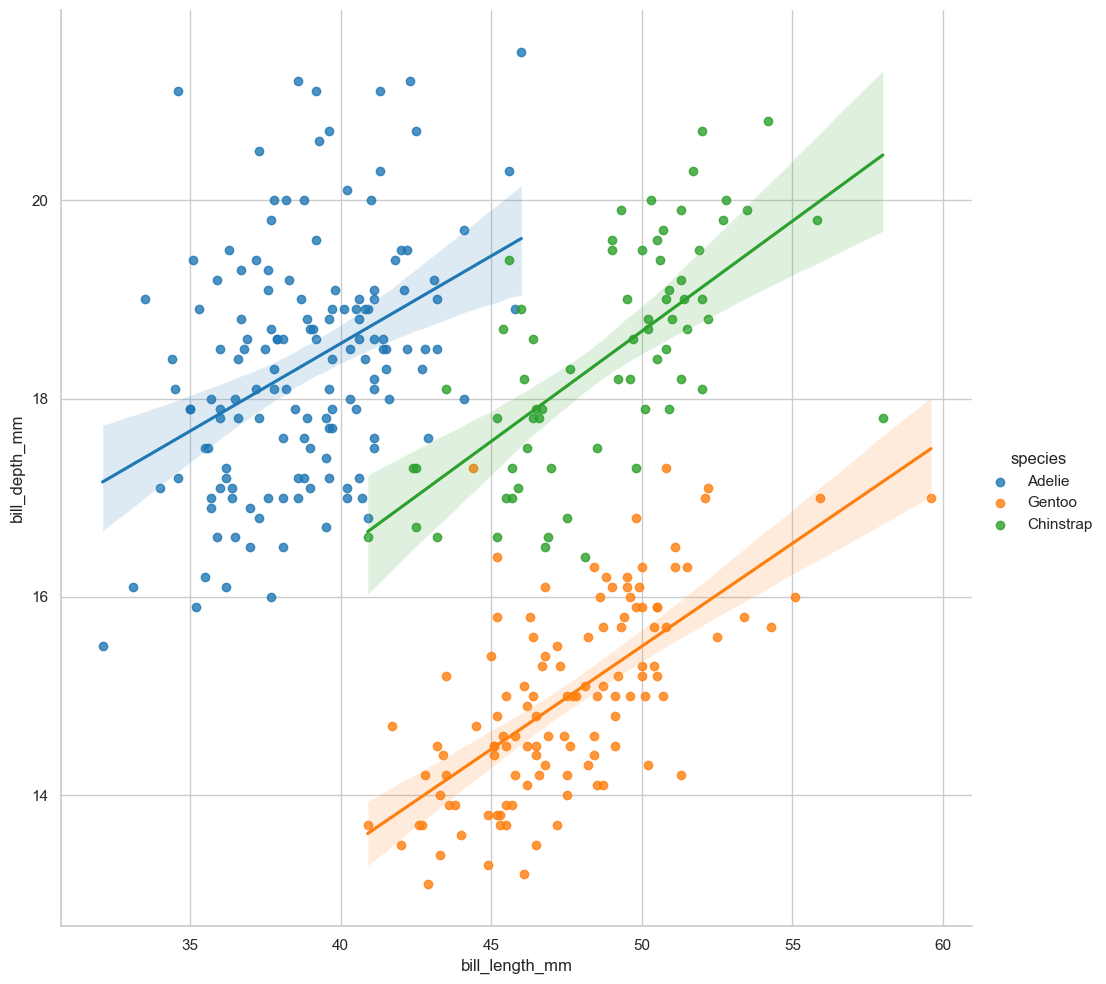

In [100]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)
# hue, col, rowstrings
# Variables that define subsets of the data, which will be drawn on separate facets in the grid. 
# See the *_order parameters to control the order of levels of this variable.

Agregando la variable de las especies nos cambio la perspectiva de como veiamos el grafico.

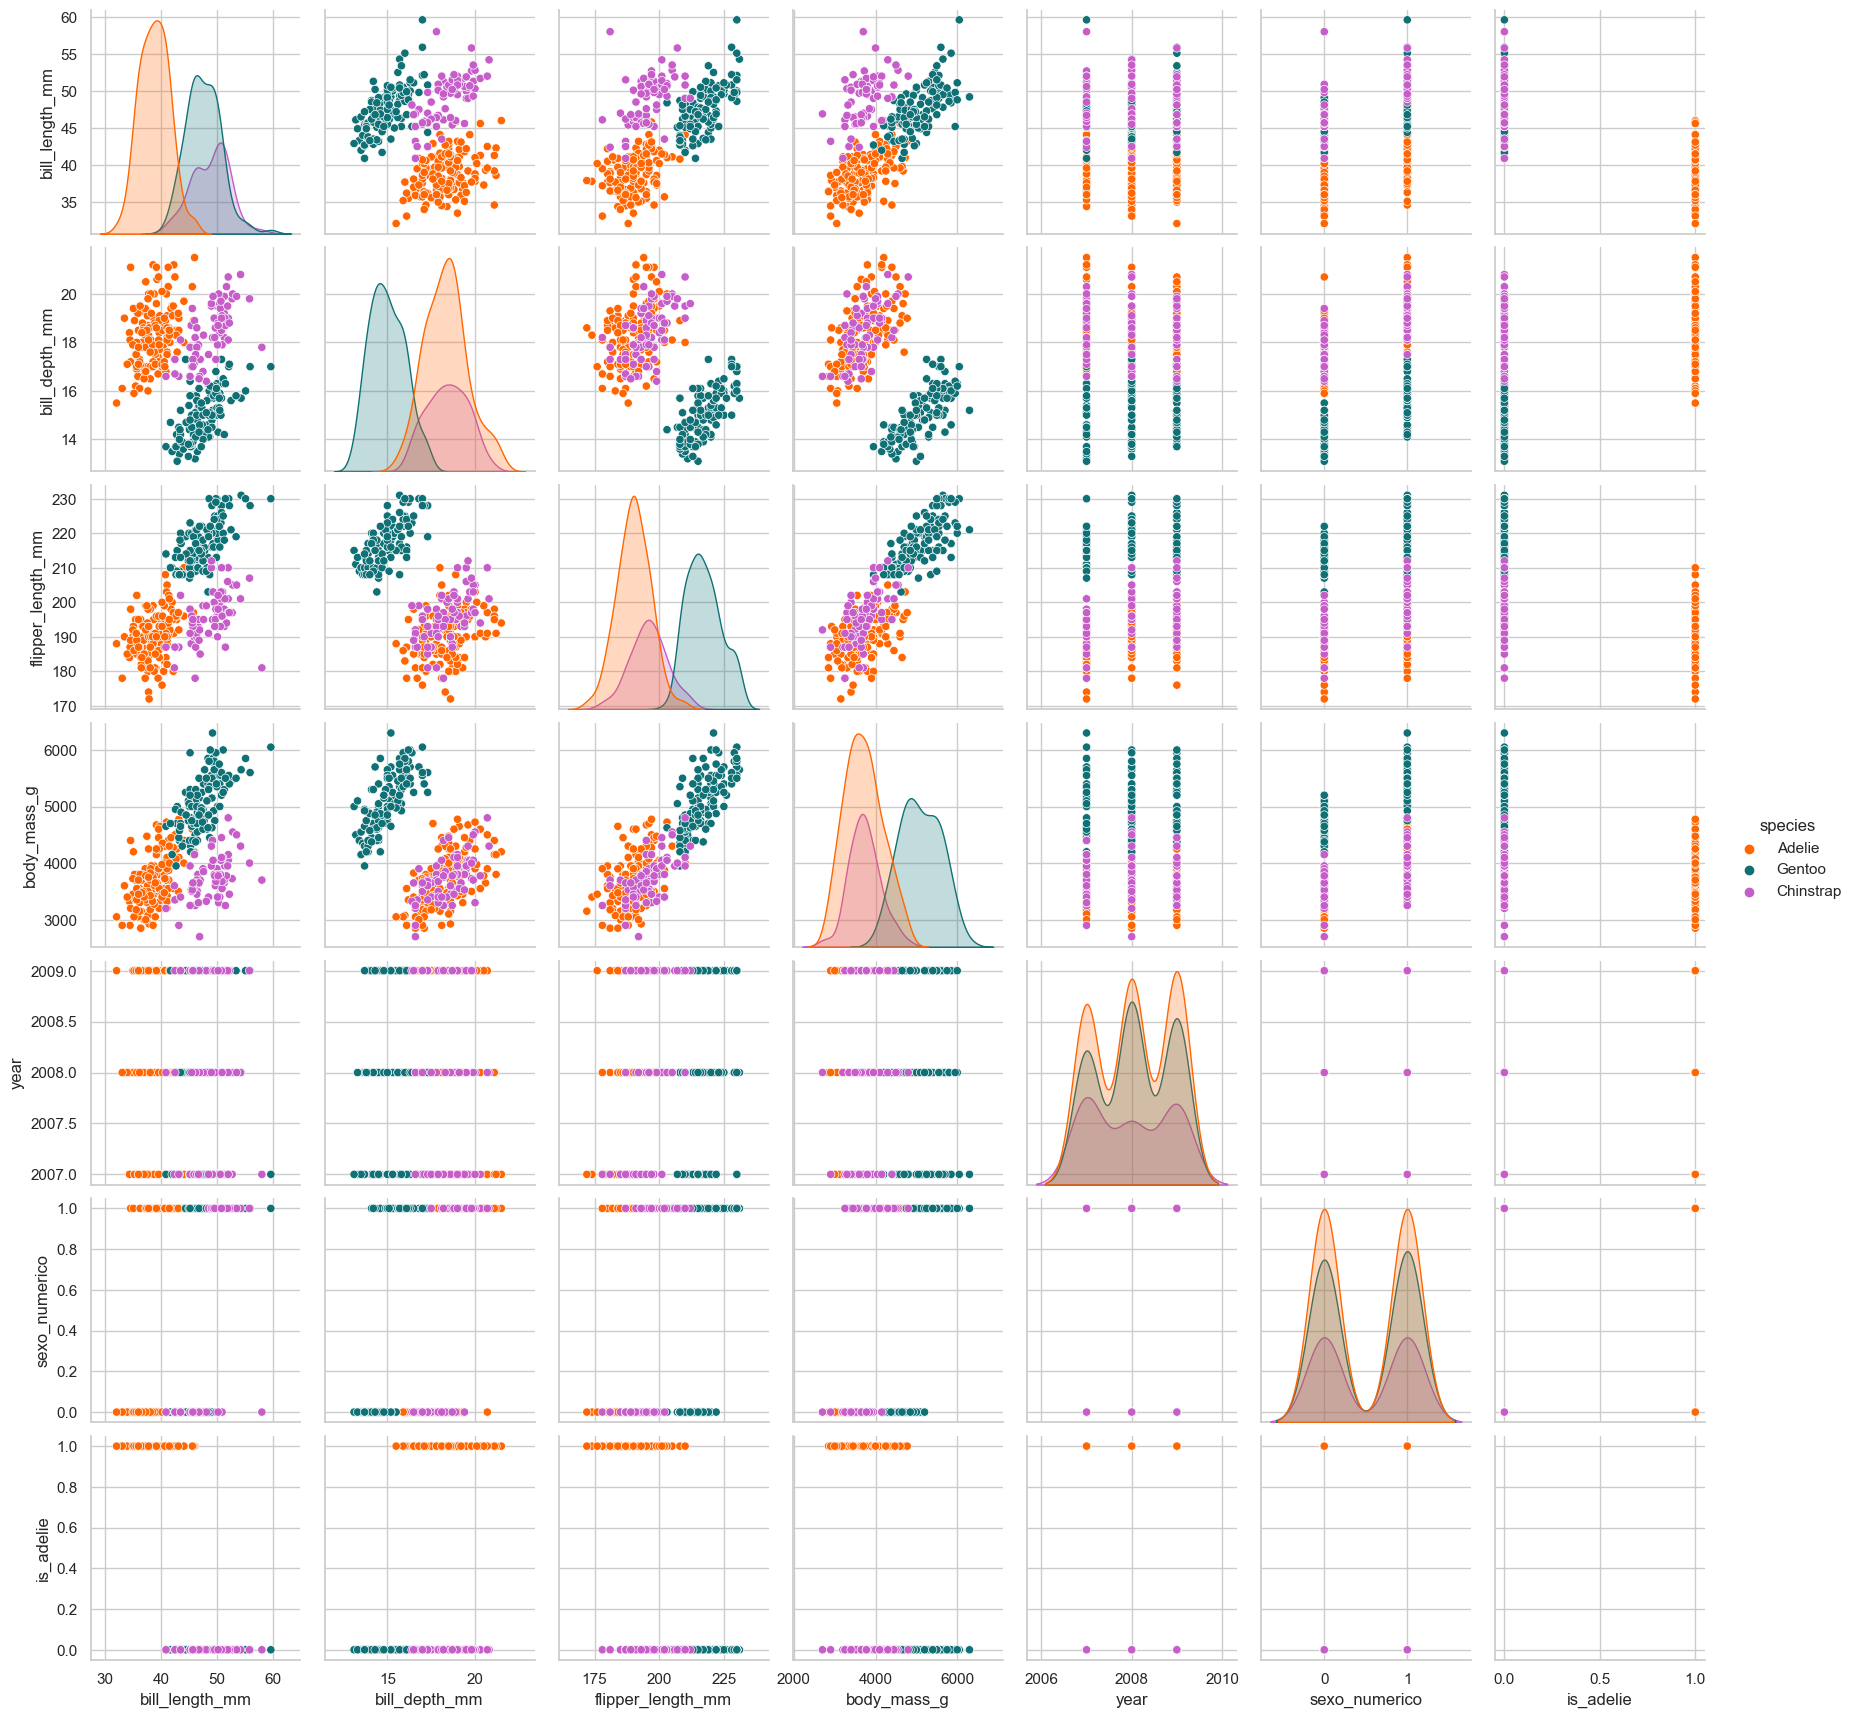

In [101]:
sns.pairplot(
    data=processed_penguins_df,
    hue='species',
    palette=penguin_color
) #Nos arroja todo un analisis estadistico 